# Proyecto 2 Resultados parciales
### Data science
- Abner Gardia 21285
- Esteban Donis 21610
- Daniel Gomez 21429
- Allan Paniagua 18084

In [1]:
# project 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from ydata_profiling import ProfileReport
import sweetviz as sv
from textblob import TextBlob
import spacy
%matplotlib inline

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Inciso 2
Analice el problema planteado y los datos.

In [2]:
train = pd.read_csv('./data/train.csv')

In [3]:
train.head()

discourse_id      essay_id  \
0  0013cc385424  007ACE74B050   
1  9704a709b505  007ACE74B050   
2  c22adee811b6  007ACE74B050   
3  a10d361e54e4  007ACE74B050   
4  db3e453ec4e2  007ACE74B050   

                                      discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness  
0                Adequate  
1                Adequate  
2                Adequate  
3                Adequate  
4                Adequate

In [4]:
train.describe()

discourse_id      essay_id  \
count          36765         36765   
unique         36765          4191   
top     0013cc385424  91B1F82B2CF1   
freq               1            23   

                                     discourse_text discourse_type  \
count                                         36765          36765   
unique                                        36691              7   
top     Summer projects should be student-designed        Evidence   
freq                                             14          12105   

       discourse_effectiveness  
count                    36765  
unique                       3  
top                   Adequate  
freq                     20977

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


### Inciso 3
Describa las tareas de limpieza y preprocesamiento que llevó a cabo.

### Cambios columna discourse_text

Eliminar cualquier símbolo que no sea una letra o número

In [6]:
train['discourse_text'] = train['discourse_text'].str.replace(r"'re", ' are', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"can't", 'can not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"n't", ' not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"'s", ' is', regex=True)

In [7]:
train['discourse_text'] = train['discourse_text'].str.replace(r"[^a-z0-9A-Z ]", ' ', regex=True)

Reemplazar abreviaciones

In [8]:
train['discourse_text'] = train['discourse_text'].str.replace(r"its", 'it is', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"doesn", 'does not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"don", 'do not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"didn", 'did not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"won", 'will not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"alot", 'a lot', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"what's", 'what is', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"thats", 'that is', regex=True)

Reemplazar palabras como dont, isnt, etc. Que no estén escritas con apostrofes

In [9]:
train['discourse_text'] = train['discourse_text'].str.replace(r"dont", 'do not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"isnt", 'is not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"wont", 'will not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"werent", 'were not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"hasnt", 'has not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"havent", 'have not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"shouldnt", 'should not', regex=True)
train['discourse_text'] = train['discourse_text'].str.replace(r"couldnt", 'could not', regex=True)

Transformar todas las palabras a minúsculas

In [10]:
train['discourse_text'] = train['discourse_text'].str.lower()

Cargamos modelo para reconocer nombres de personas y paises

In [11]:
# nlp = spacy.load("en_core_web_sm")

Corrector de errores de escritura

In [12]:
def wordCorrection(text):
    
    doc = nlp(text)
    named_entities = {ent.text for ent in doc.ents}

    words = text.split()

    corrected_words = []
    for word in words:
        if word in named_entities:
            corrected_words.append(word)
        else:
            corrected_word = str(TextBlob(word).correct())
            corrected_words.append(corrected_word)

    return ' '.join(corrected_words)

In [13]:
# train['discourse_text'] = train['discourse_text'].apply(wordCorrection)

Eliminar stop words del texto

In [14]:
stopWordsEnglish = set(stopwords.words('english'))

def deleteStopWords(text):
    words = text.split()

    processed_words = [word for word in words if word not in stopWordsEnglish]

    return ' '.join(processed_words)

In [15]:
train['discourse_text'] = train['discourse_text'].apply(deleteStopWords)

### Cambios columna discourse_type

In [16]:
train['discourse_type'] = train['discourse_type'].str.lower()
train['discourse_type'] = train['discourse_type'].str.replace(r"[^a-z0-9 ]", ' ', regex=True)

### Cambios columna discourse_effectiveness

In [17]:
train['discourse_effectiveness'] = train['discourse_effectiveness'].str.lower()
train['discourse_effectiveness'] = train['discourse_effectiveness'].str.replace(r"[^a-z0-9 ]", ' ', regex=True)

#### Delete duplicated rows

In [18]:
train = train.drop_duplicates()

#### Normalize text data

In [19]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text.strip()

train['discourse_text'] = train['discourse_text'].apply(normalize_text)

#### Lematization

In [20]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

train['discourse_text'] = train['discourse_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Encode categorical variables

In [21]:
le = LabelEncoder()
train['discourse_type'] = le.fit_transform(train['discourse_type'])
train['discourse_effectiveness'] = le.fit_transform(train['discourse_effectiveness'])

#### Add new features

In [22]:
train['text_length'] = train['discourse_text'].str.len()
train['word_count'] = train['discourse_text'].str.split().str.len()

#### Save data into a csv file

In [24]:
train.to_csv('result/data_cleaned.csv', index=False)

### Inciso 4
##### Analisis Exploratorio

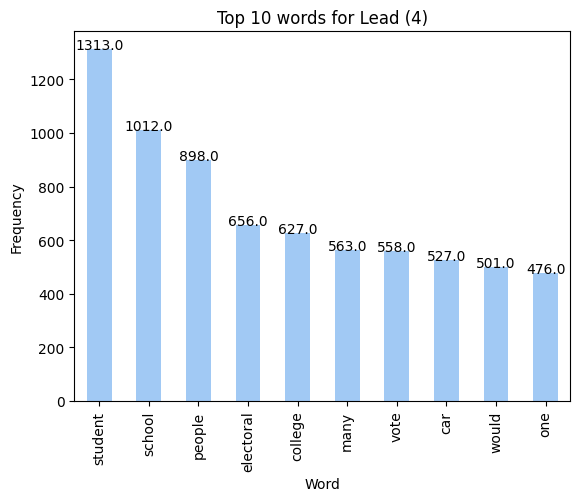

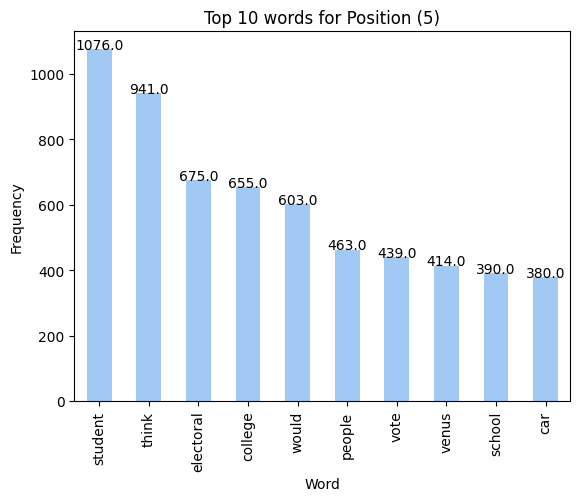

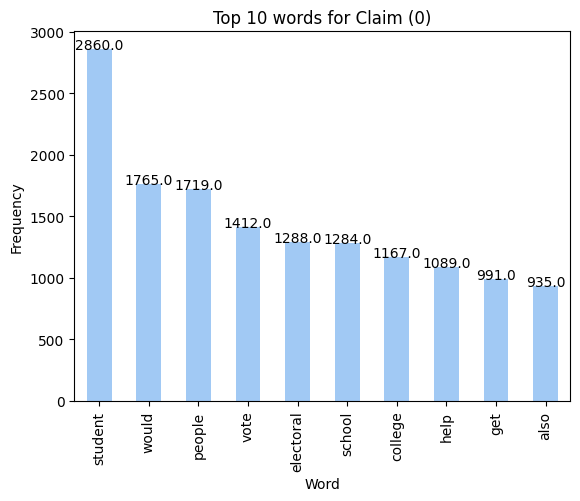

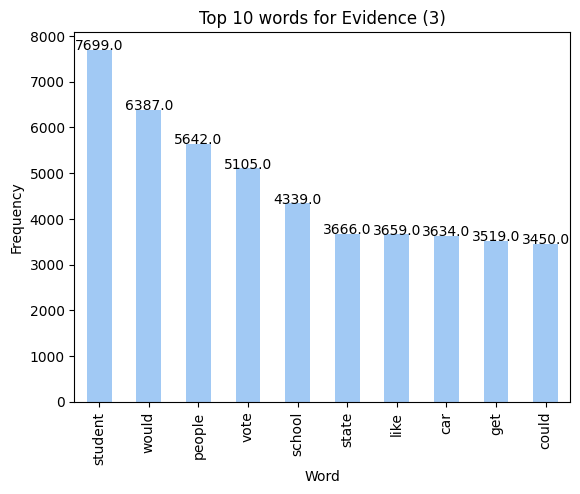

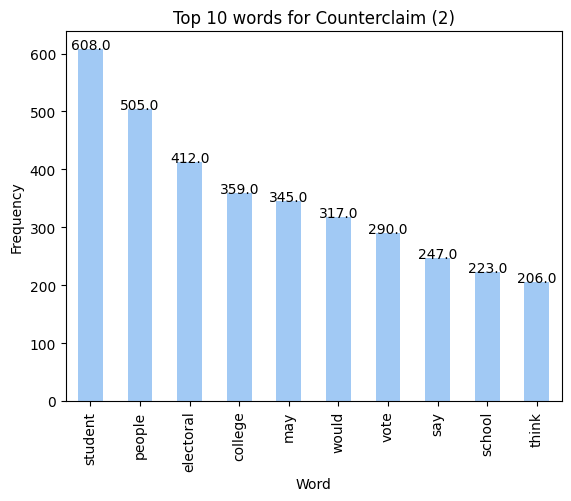

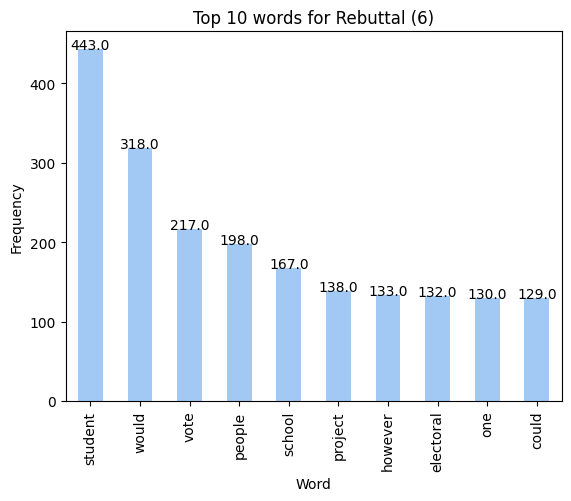

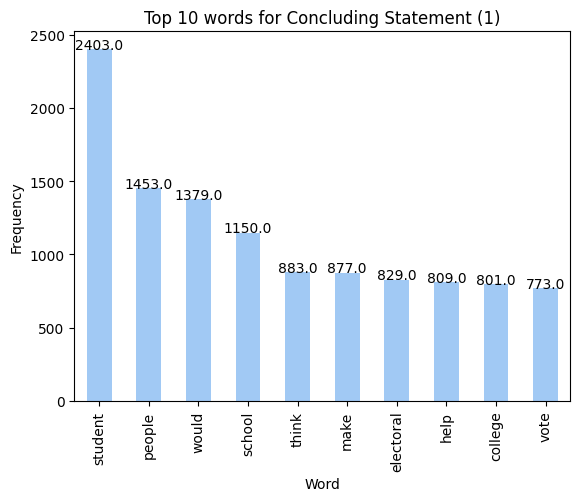

In [26]:
# count words frequency in every type of discourse
def count_words(text):
    words = text.split()
    return Counter(words)

# make a list with all discourse types (0 to 6)
discourse_types = train['discourse_type'].unique()
# create a dictionary to store the word frequency for each type of discourse
word_frequency = {}
# iterate over the discourse types

for discourse_type in discourse_types:
    # filter the dataset by discourse type
    discourse_type_data = train[train['discourse_type'] == discourse_type]
    # get the text data
    text_data = discourse_type_data['discourse_text']
    # join all text data into a single string
    text = ' '.join(text_data)
    # count the word frequency
    frequency = count_words(text)
    # store the frequency in the dictionary
    word_frequency[discourse_type] = frequency

# create a dataframe to store the word frequency
word_frequency_df = pd.DataFrame(word_frequency)
# fill the missing values with 0
word_frequency_df = word_frequency_df.fillna(0)
# print results
# print(word_frequency_df)

discourseTypes = ["Claim", "Concluding Statement", "Counterclaim", "Evidence", "Lead", "Position", "Rebuttal"]

# plot the word frequency for each type of discourse with the first 10 words with the highest frequency in each type
for discourse_type in discourse_types:
    # get the word frequency for the current type of discourse
    frequency = word_frequency_df[discourse_type]
    # sort the frequency in descending order
    frequency = frequency.sort_values(ascending=False)
    # get the first 10 words
    frequency = frequency.head(10)
    # show it in a bar plot by type of discourse every graph one by one
    plt.figure()
    # use different colors for every bar
    sns.set_palette('pastel')
    # plot the frequency
    frequency.plot(kind='bar')
    # set the title
    plt.title(f'Top 10 words for {discourseTypes[discourse_type]} ({discourse_type})')
    # set the x label
    plt.xlabel('Word')
    # set the y label
    plt.ylabel('Frequency')
    # show each bar label number
    for i in range(len(frequency)):
        plt.text(i, frequency.iloc[i], frequency.iloc[i], ha = 'center')
    # show the plot
    plt.show()


                4     5     0     3     2    6     1
Adequate     1244  2784  7097  6064  1150  693  1945
Effective     683   770  3405  2885   418  340   825
Ineffective   364   470  1475  3156   205  211   581


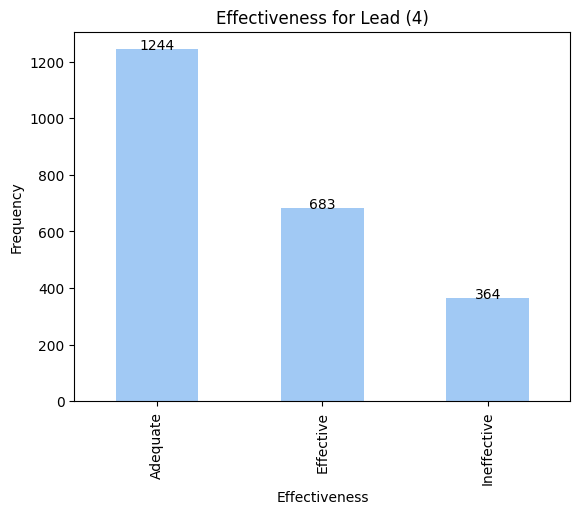

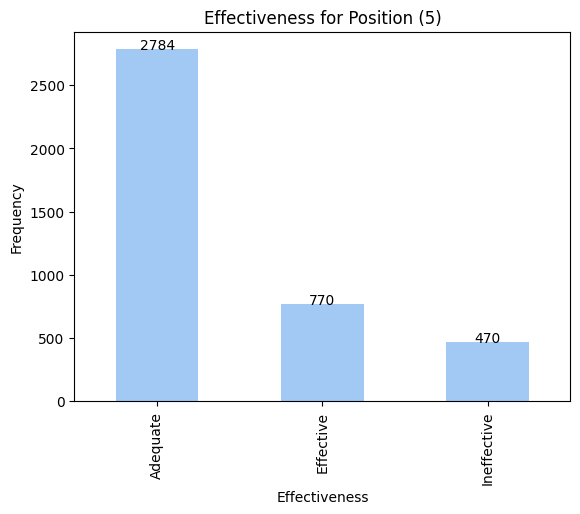

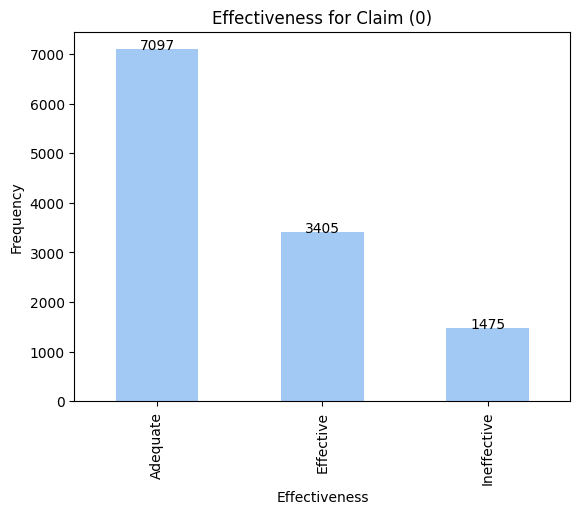

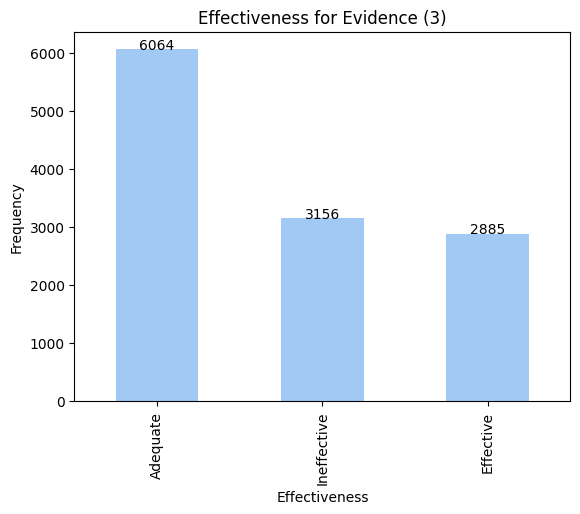

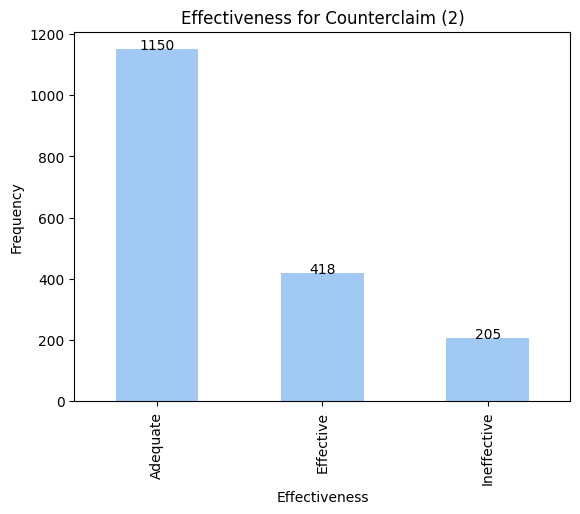

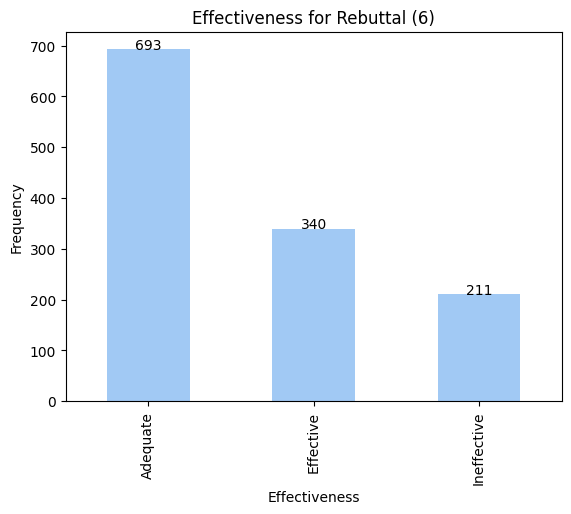

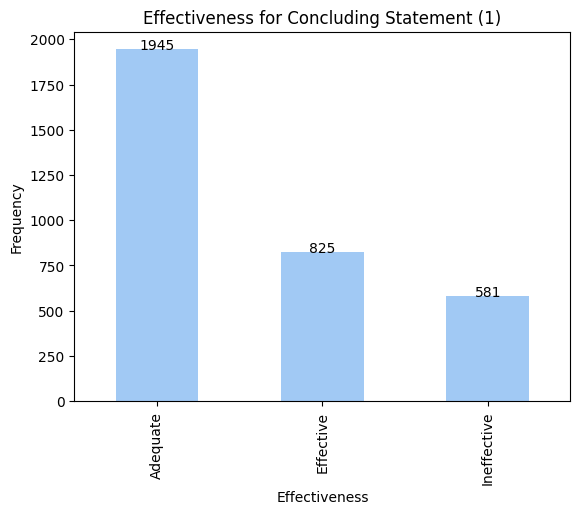

In [27]:
# make a list with all discourse types (0 to 6)
discourse_types = train['discourse_type'].unique()
discourseEffectiveness = ["Adequate", "Effective", "Ineffective"]
discourseTypes = ["Claim", "Concluding Statement", "Counterclaim", "Evidence", "Lead", "Position", "Rebuttal"]
# create a dictionary to store the word frequency for each type of discourse
effectiveness = {}

for discourse_type in discourse_types:
    # list how many 0s, 1s and 2s are in the effectivenes_type column, this are the column
    effectiveness_frequency = train[train['discourse_type'] == discourse_type]['discourse_effectiveness'].value_counts()
    # replace 0s with 'Adequate', 1s with 'Effective' and 2s with 'Ineffective'
    # effectiveness_frequency.index = discourseEffectiveness
    effectiveness[discourse_type] = effectiveness_frequency

effectiveness_df = pd.DataFrame(effectiveness)

#                             4     5     0     3     2    6     1
# discourse_effectiveness                                         
# 0                        1244  2784  7097  6064  1150  693  1945
# 1                         683   770  3405  2885   418  340   825
# 2                         364   470  1475  3156   205  211   581

# replace the index with the discourseEffectiveness list
effectiveness_df.index = discourseEffectiveness

print(effectiveness_df)

for discourse_type in discourse_types:
    # get the word frequency for the current type of discourse
    frequency = effectiveness_df[discourse_type]
    # sort the frequency in descending order
    frequency = frequency.sort_values(ascending=False)
    # get the first 10 words
    frequency = frequency.head(10)
    # show it in a bar plot by type of discourse every graph one by one
    plt.figure()
    # use different colors for every bar
    sns.set_palette('pastel')
    # plot the frequency
    frequency.plot(kind='bar')
    # set the title
    plt.title(f'Effectiveness for {discourseTypes[discourse_type]} ({discourse_type})')
    # set the x label
    plt.xlabel('Effectiveness')
    # set the y label
    plt.ylabel('Frequency')
    # show the number of each bar
    for i in range(len(frequency)):
        plt.text(i, frequency.iloc[i], frequency.iloc[i], ha='center')
    # show the plot
    plt.show()


#### Expoloratory analysis Results

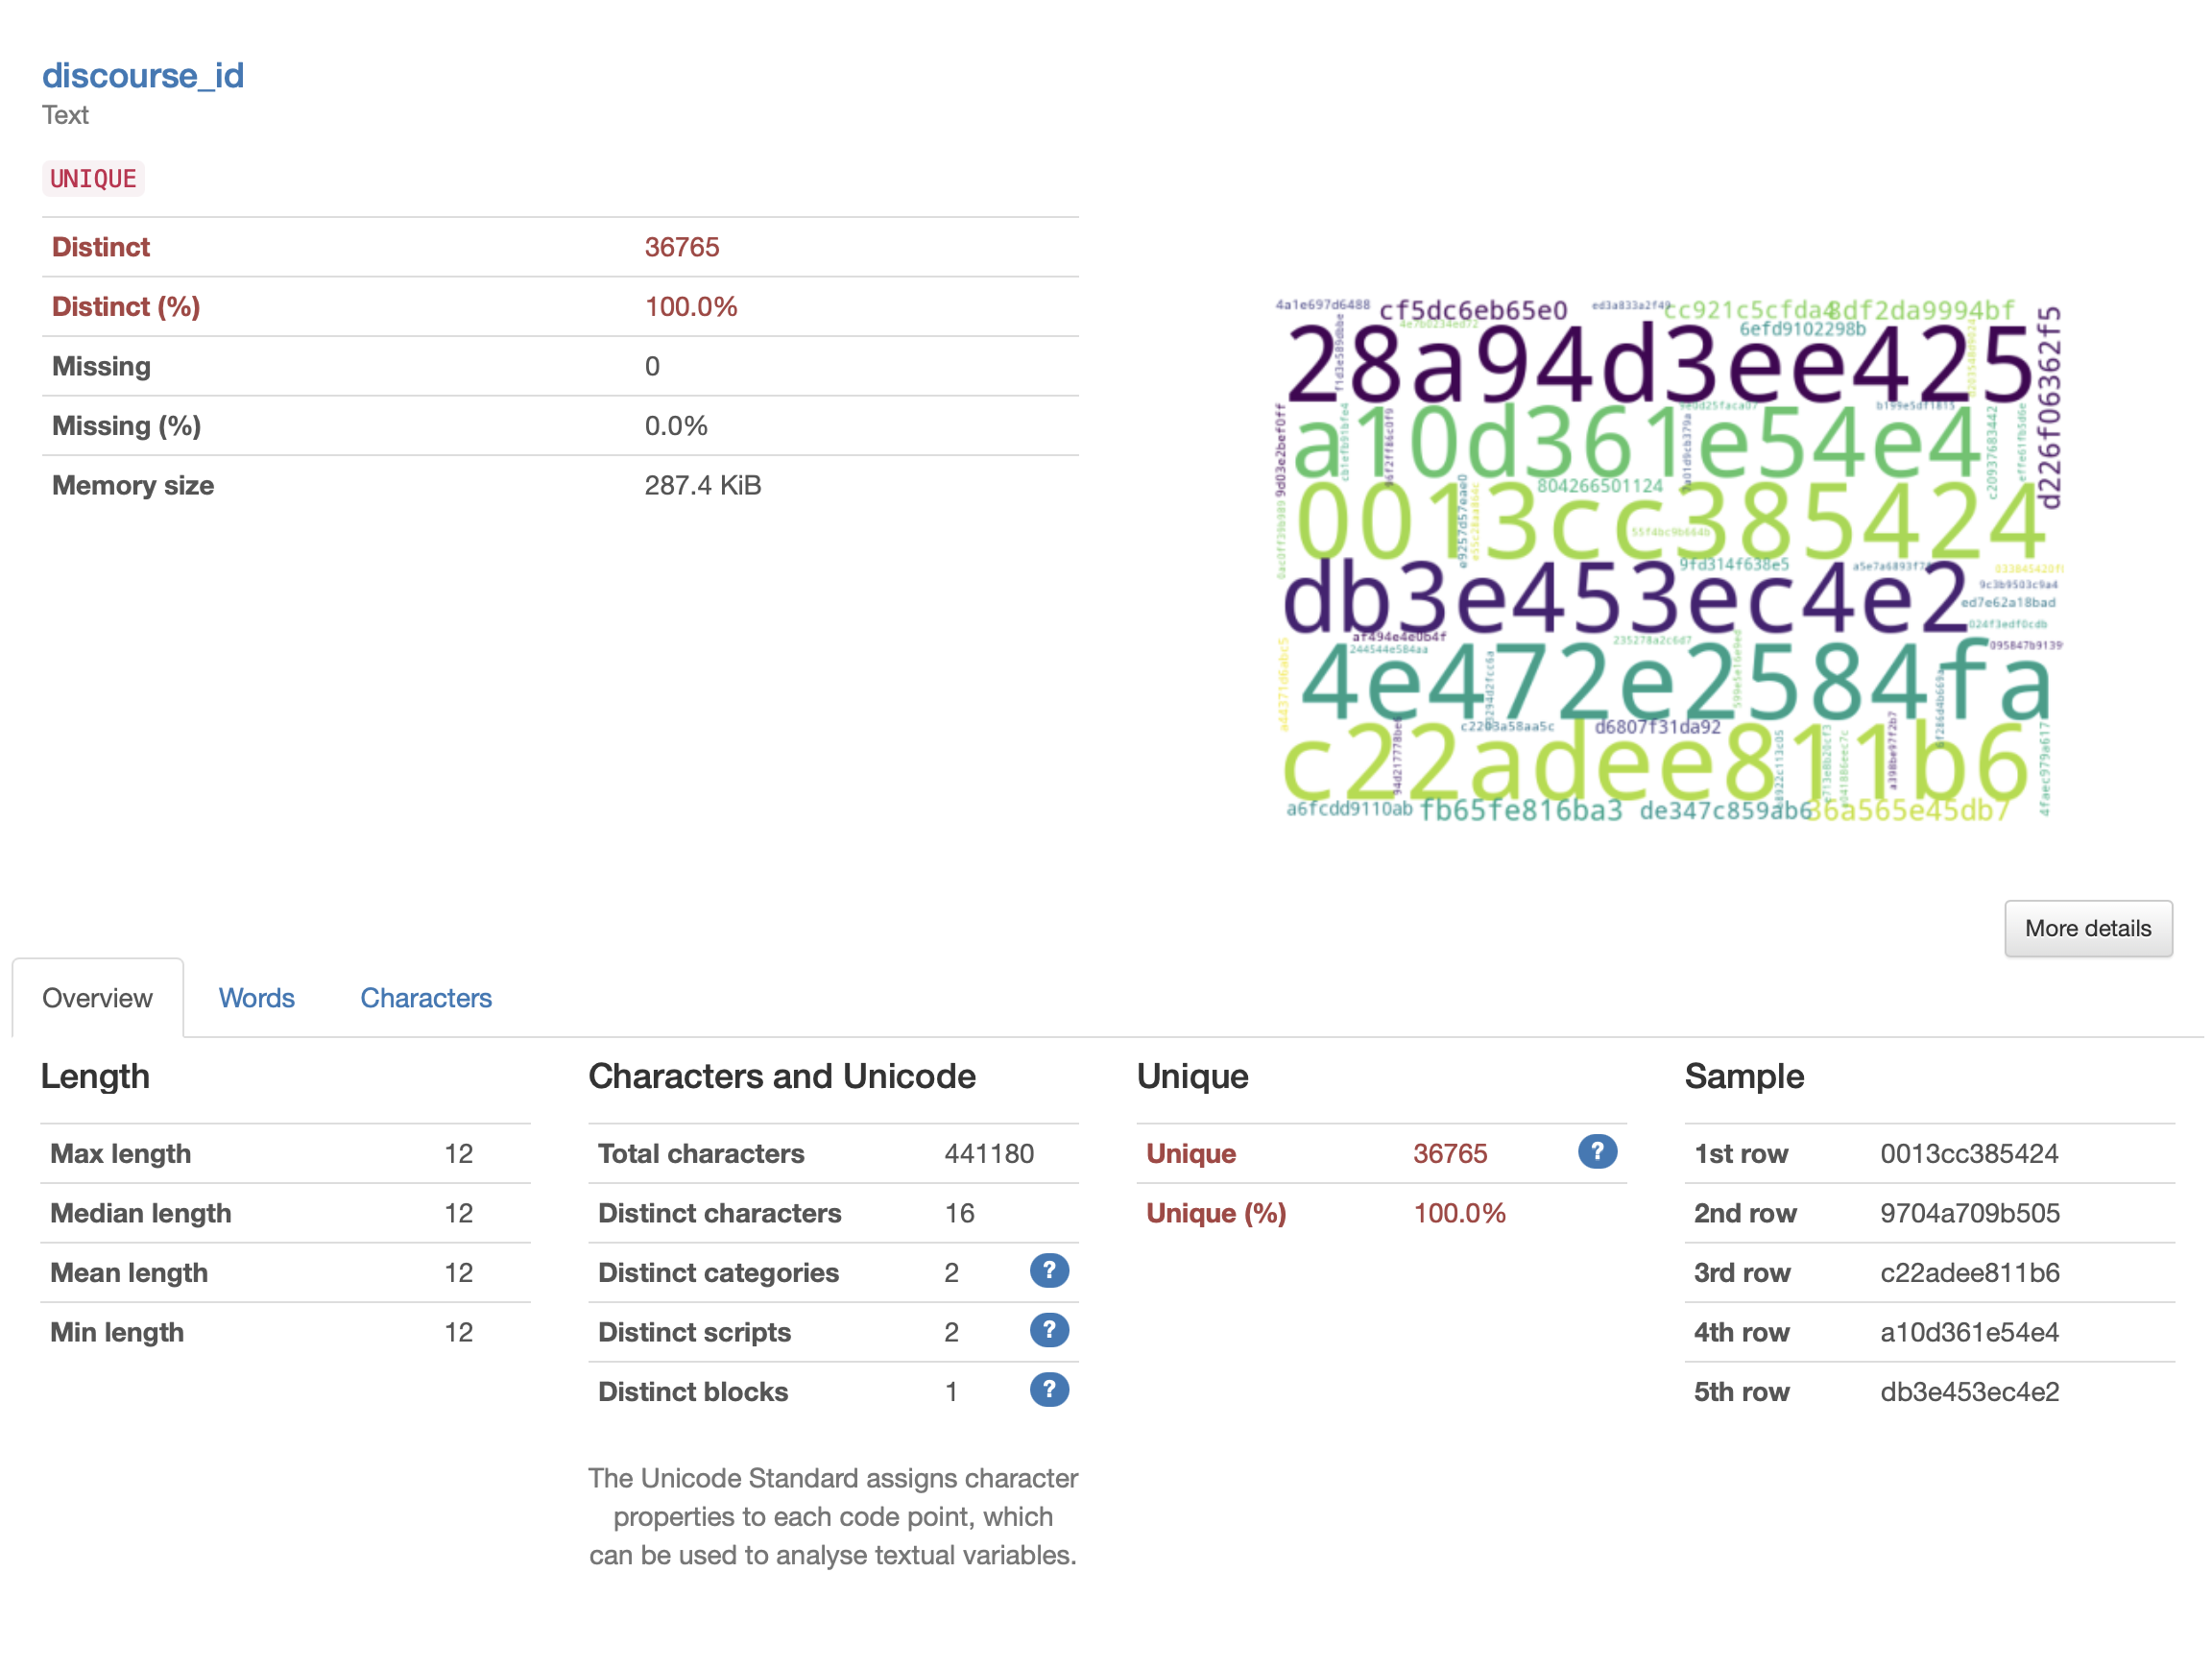

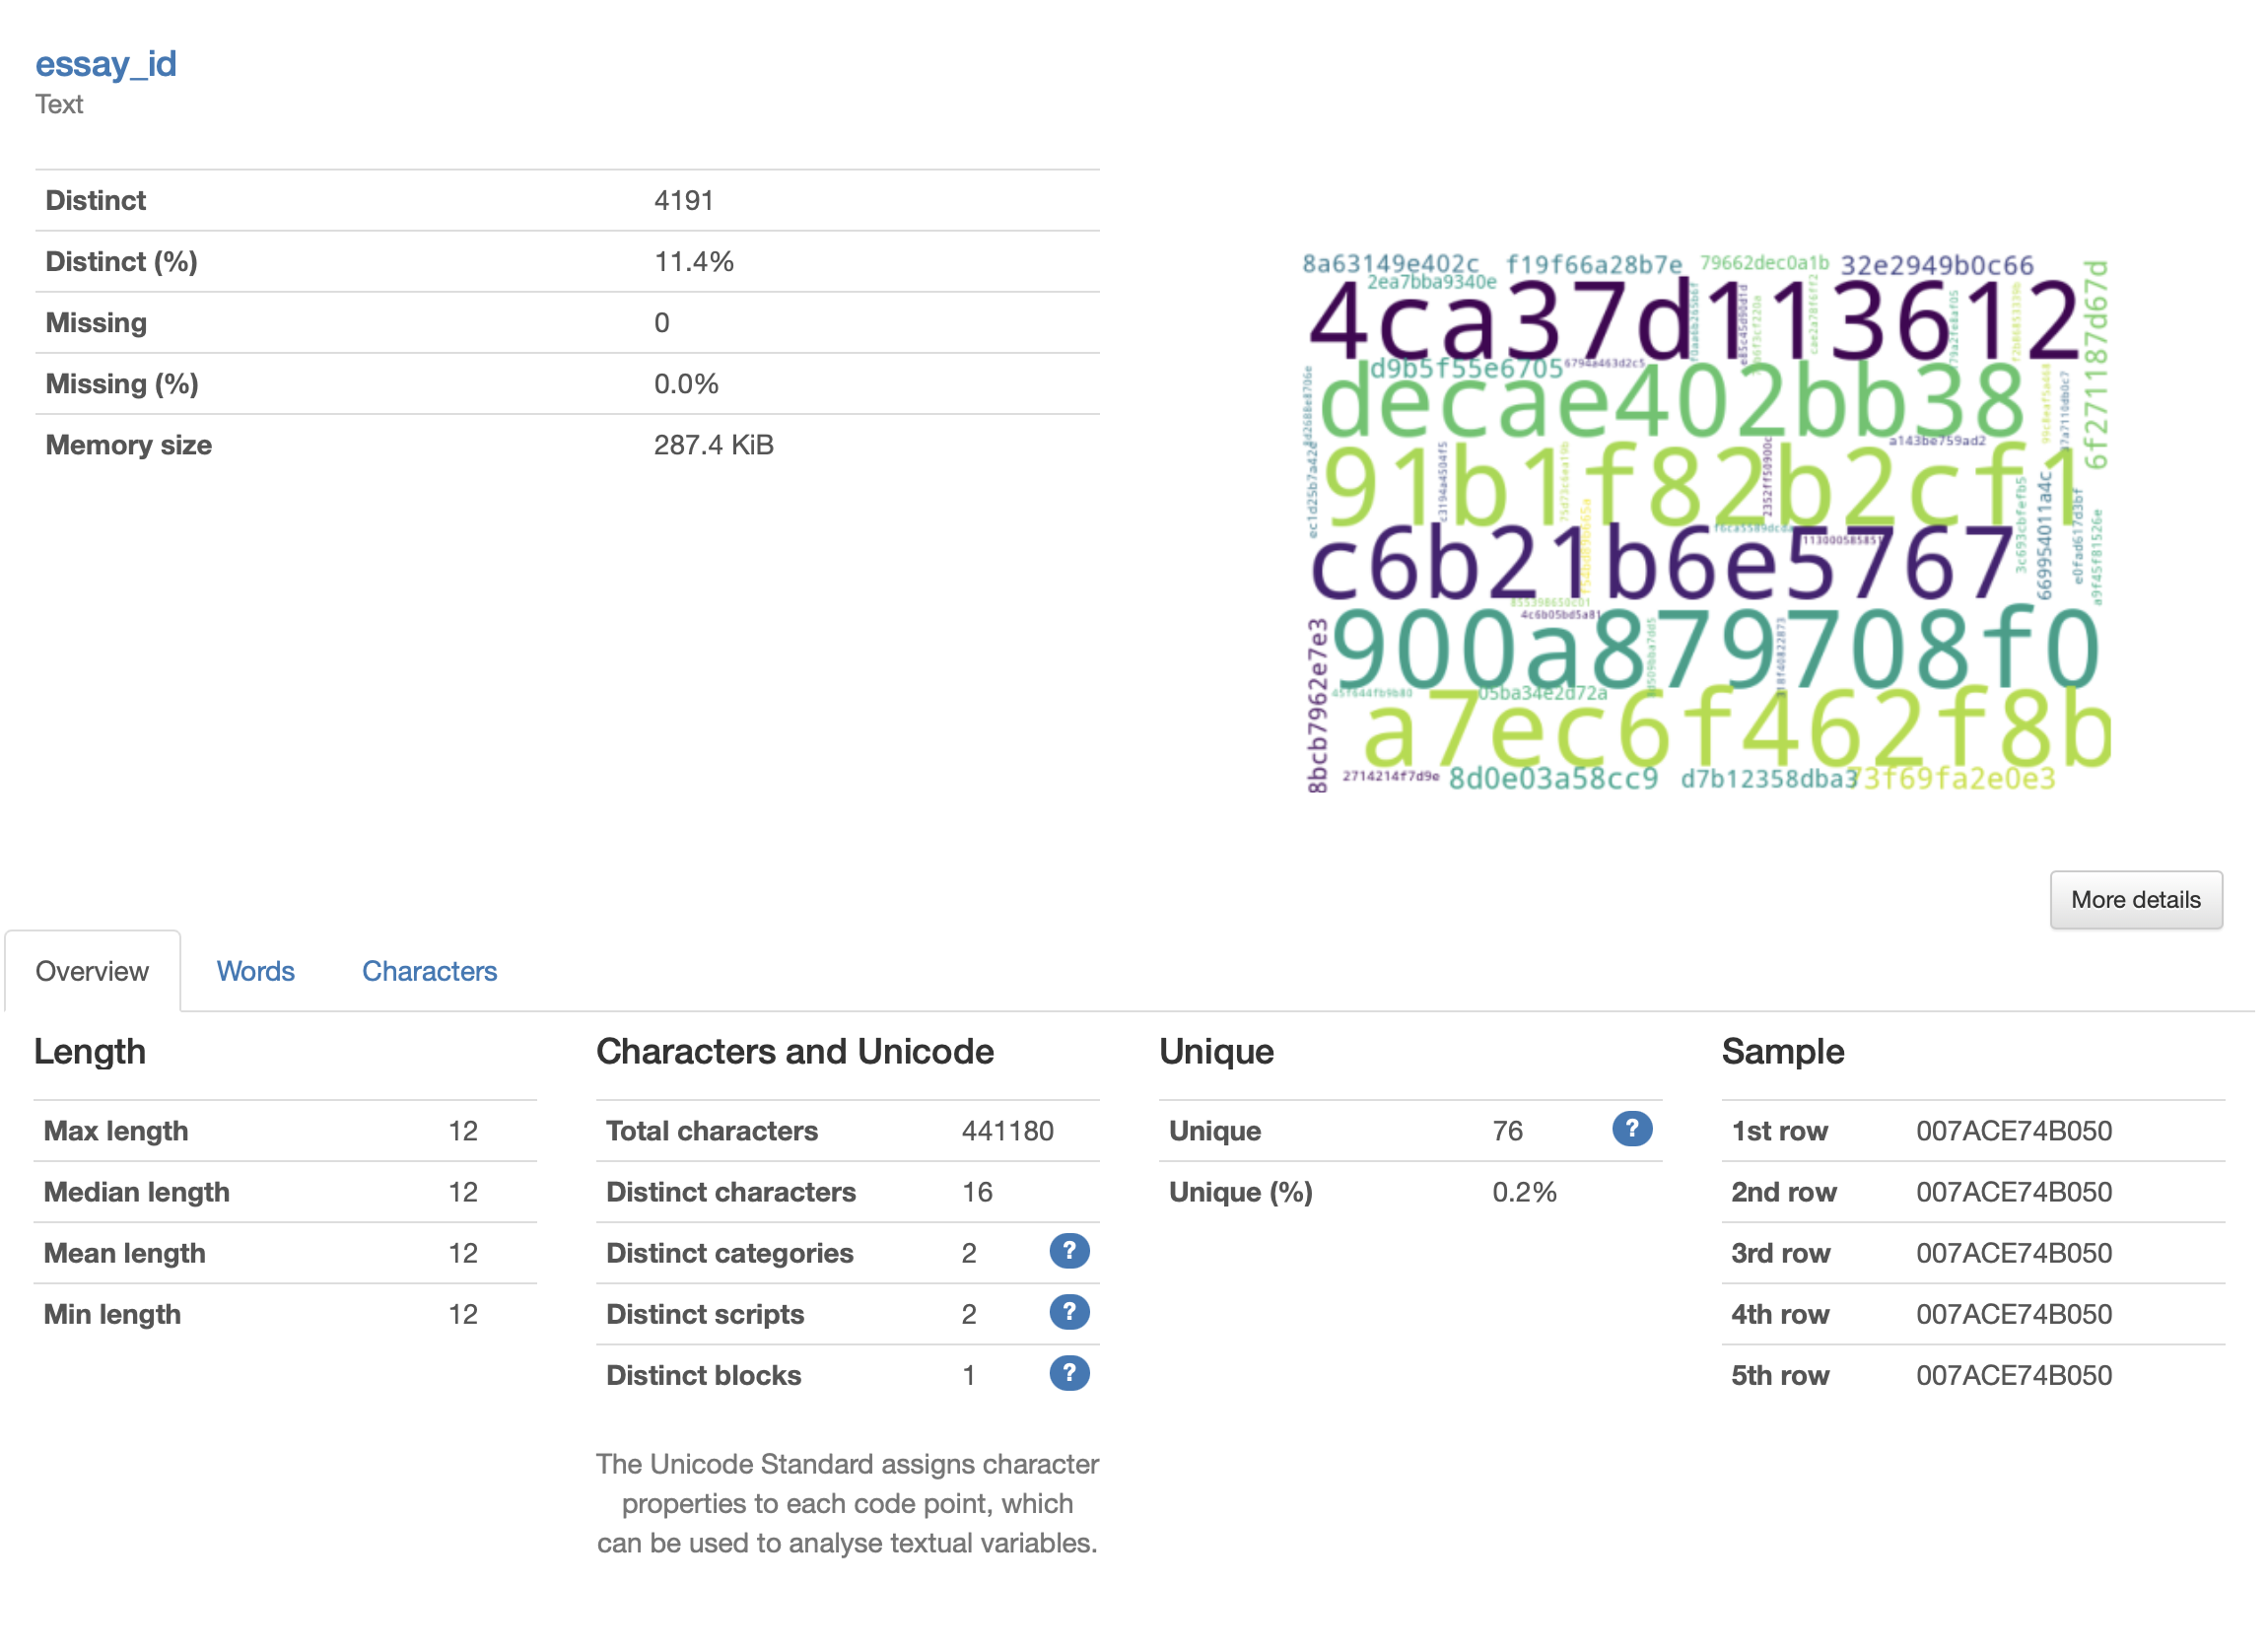

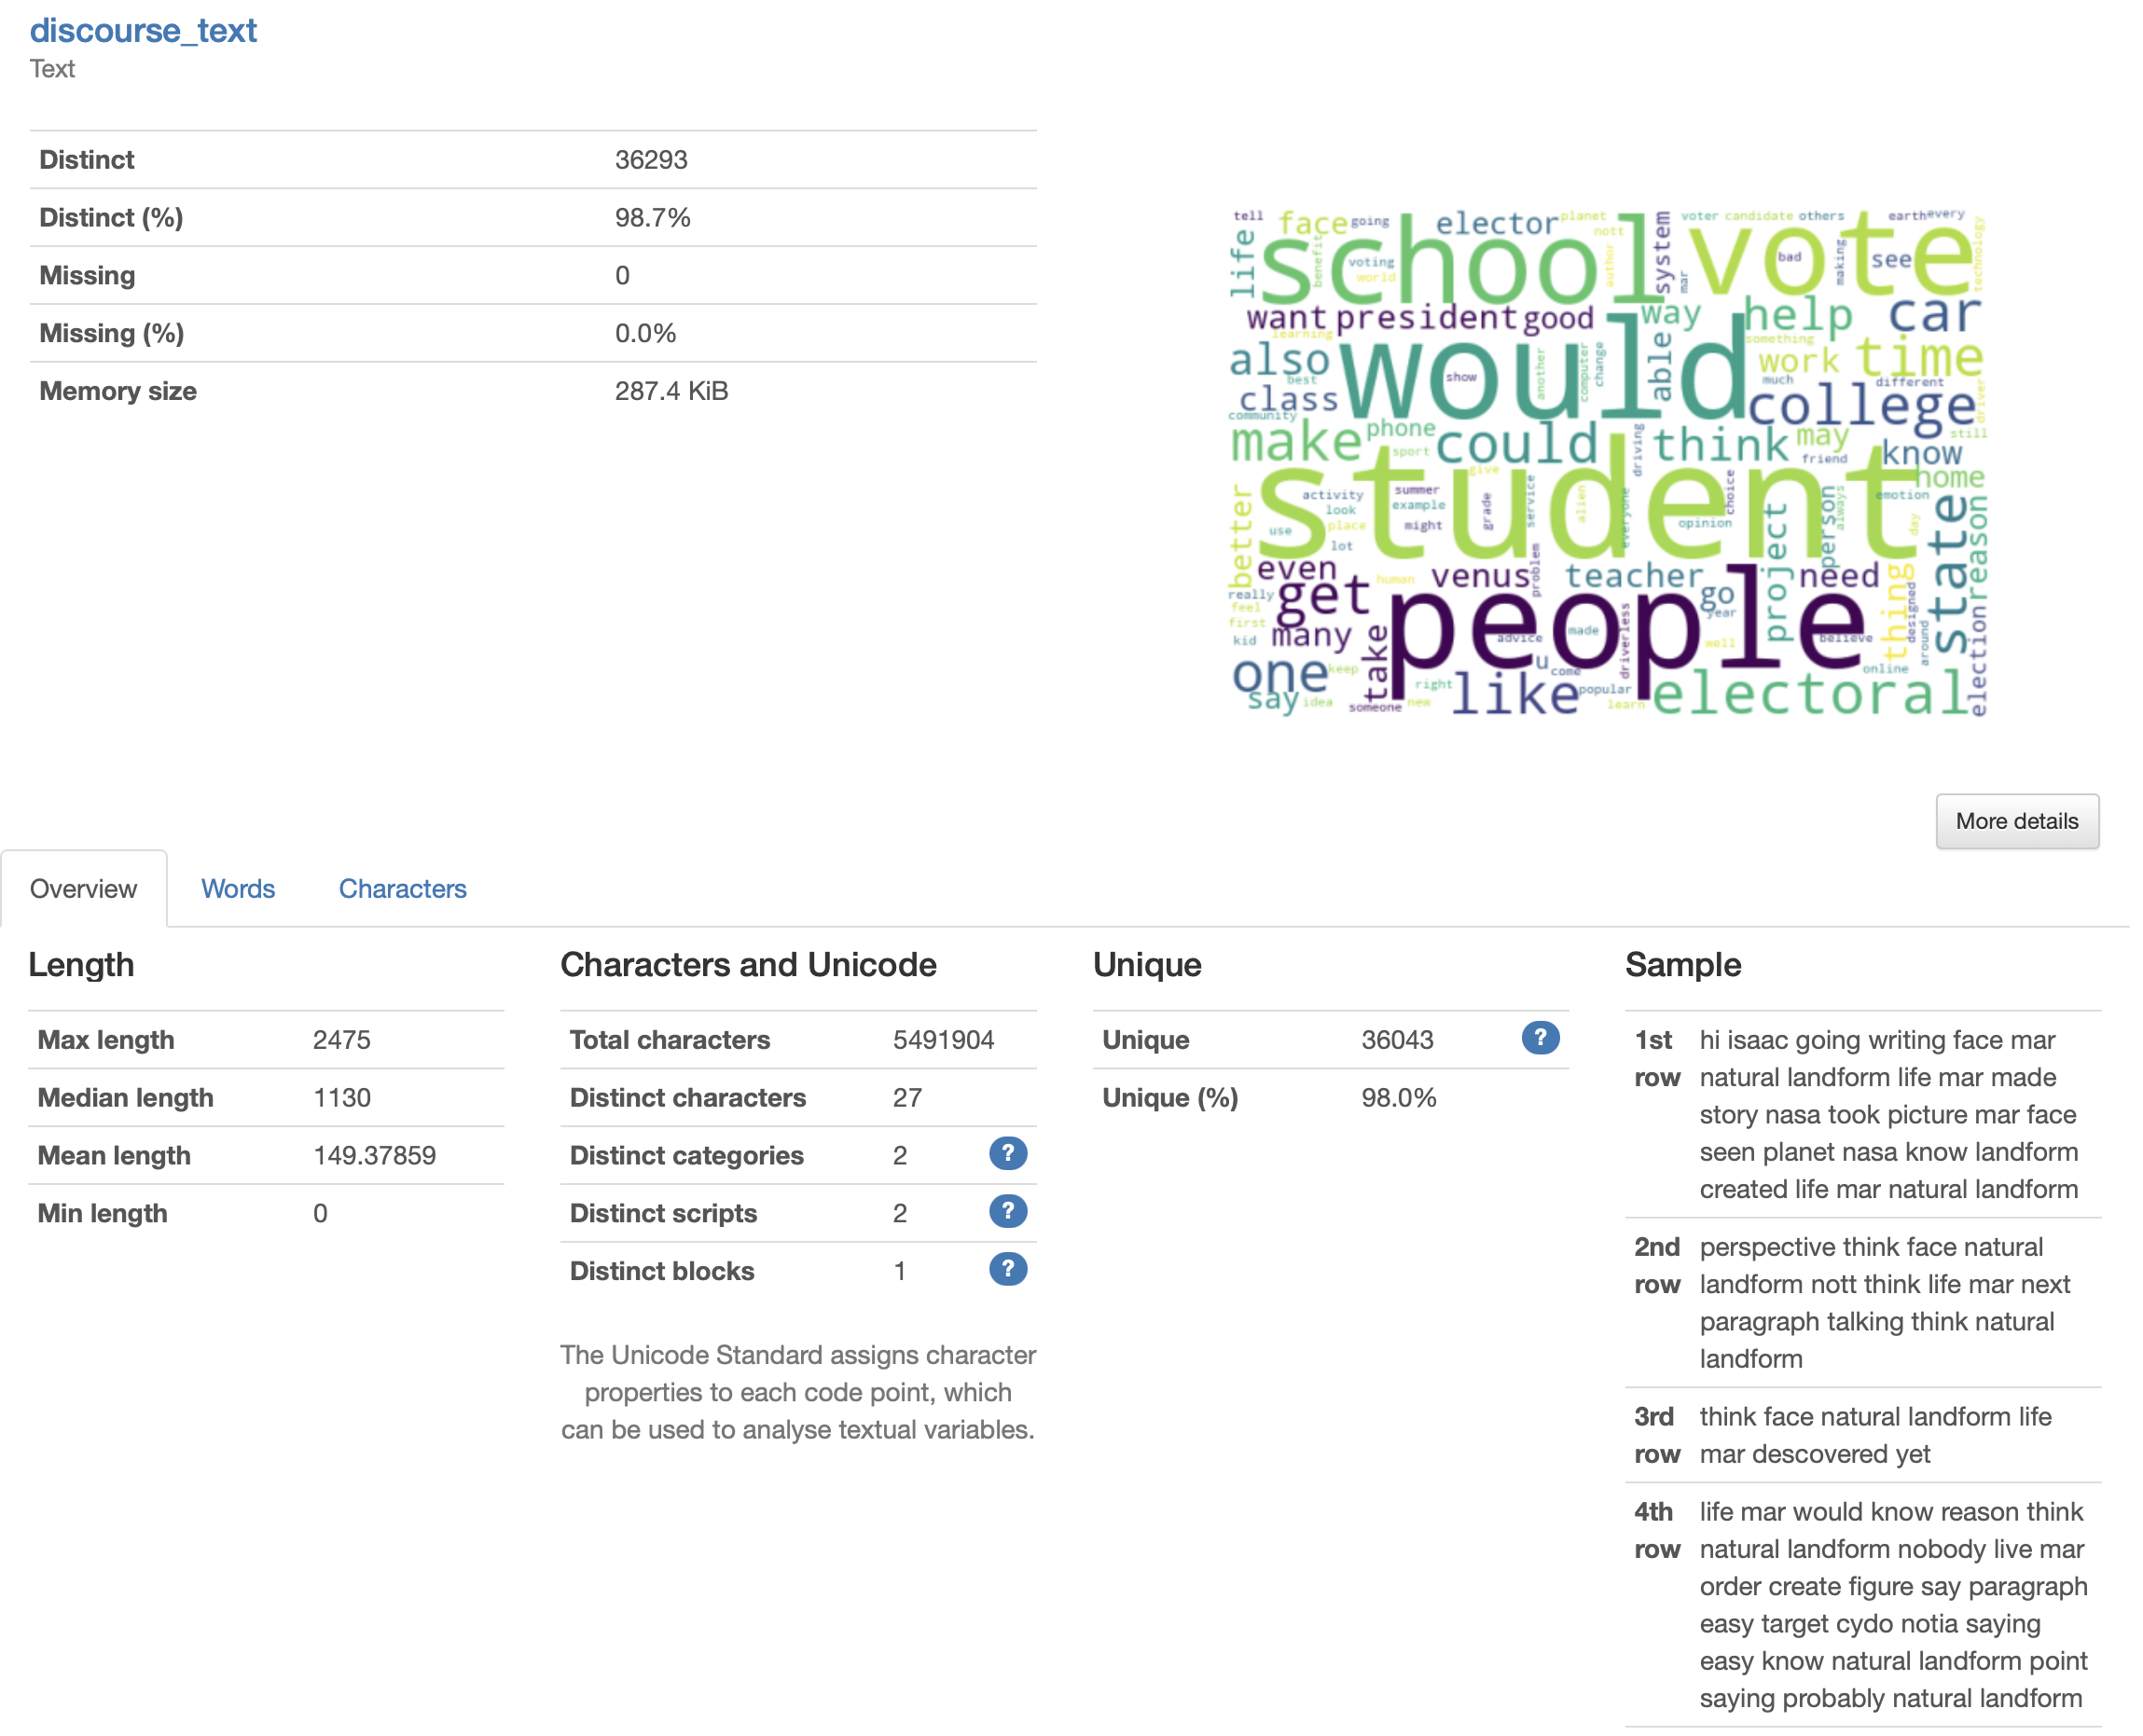

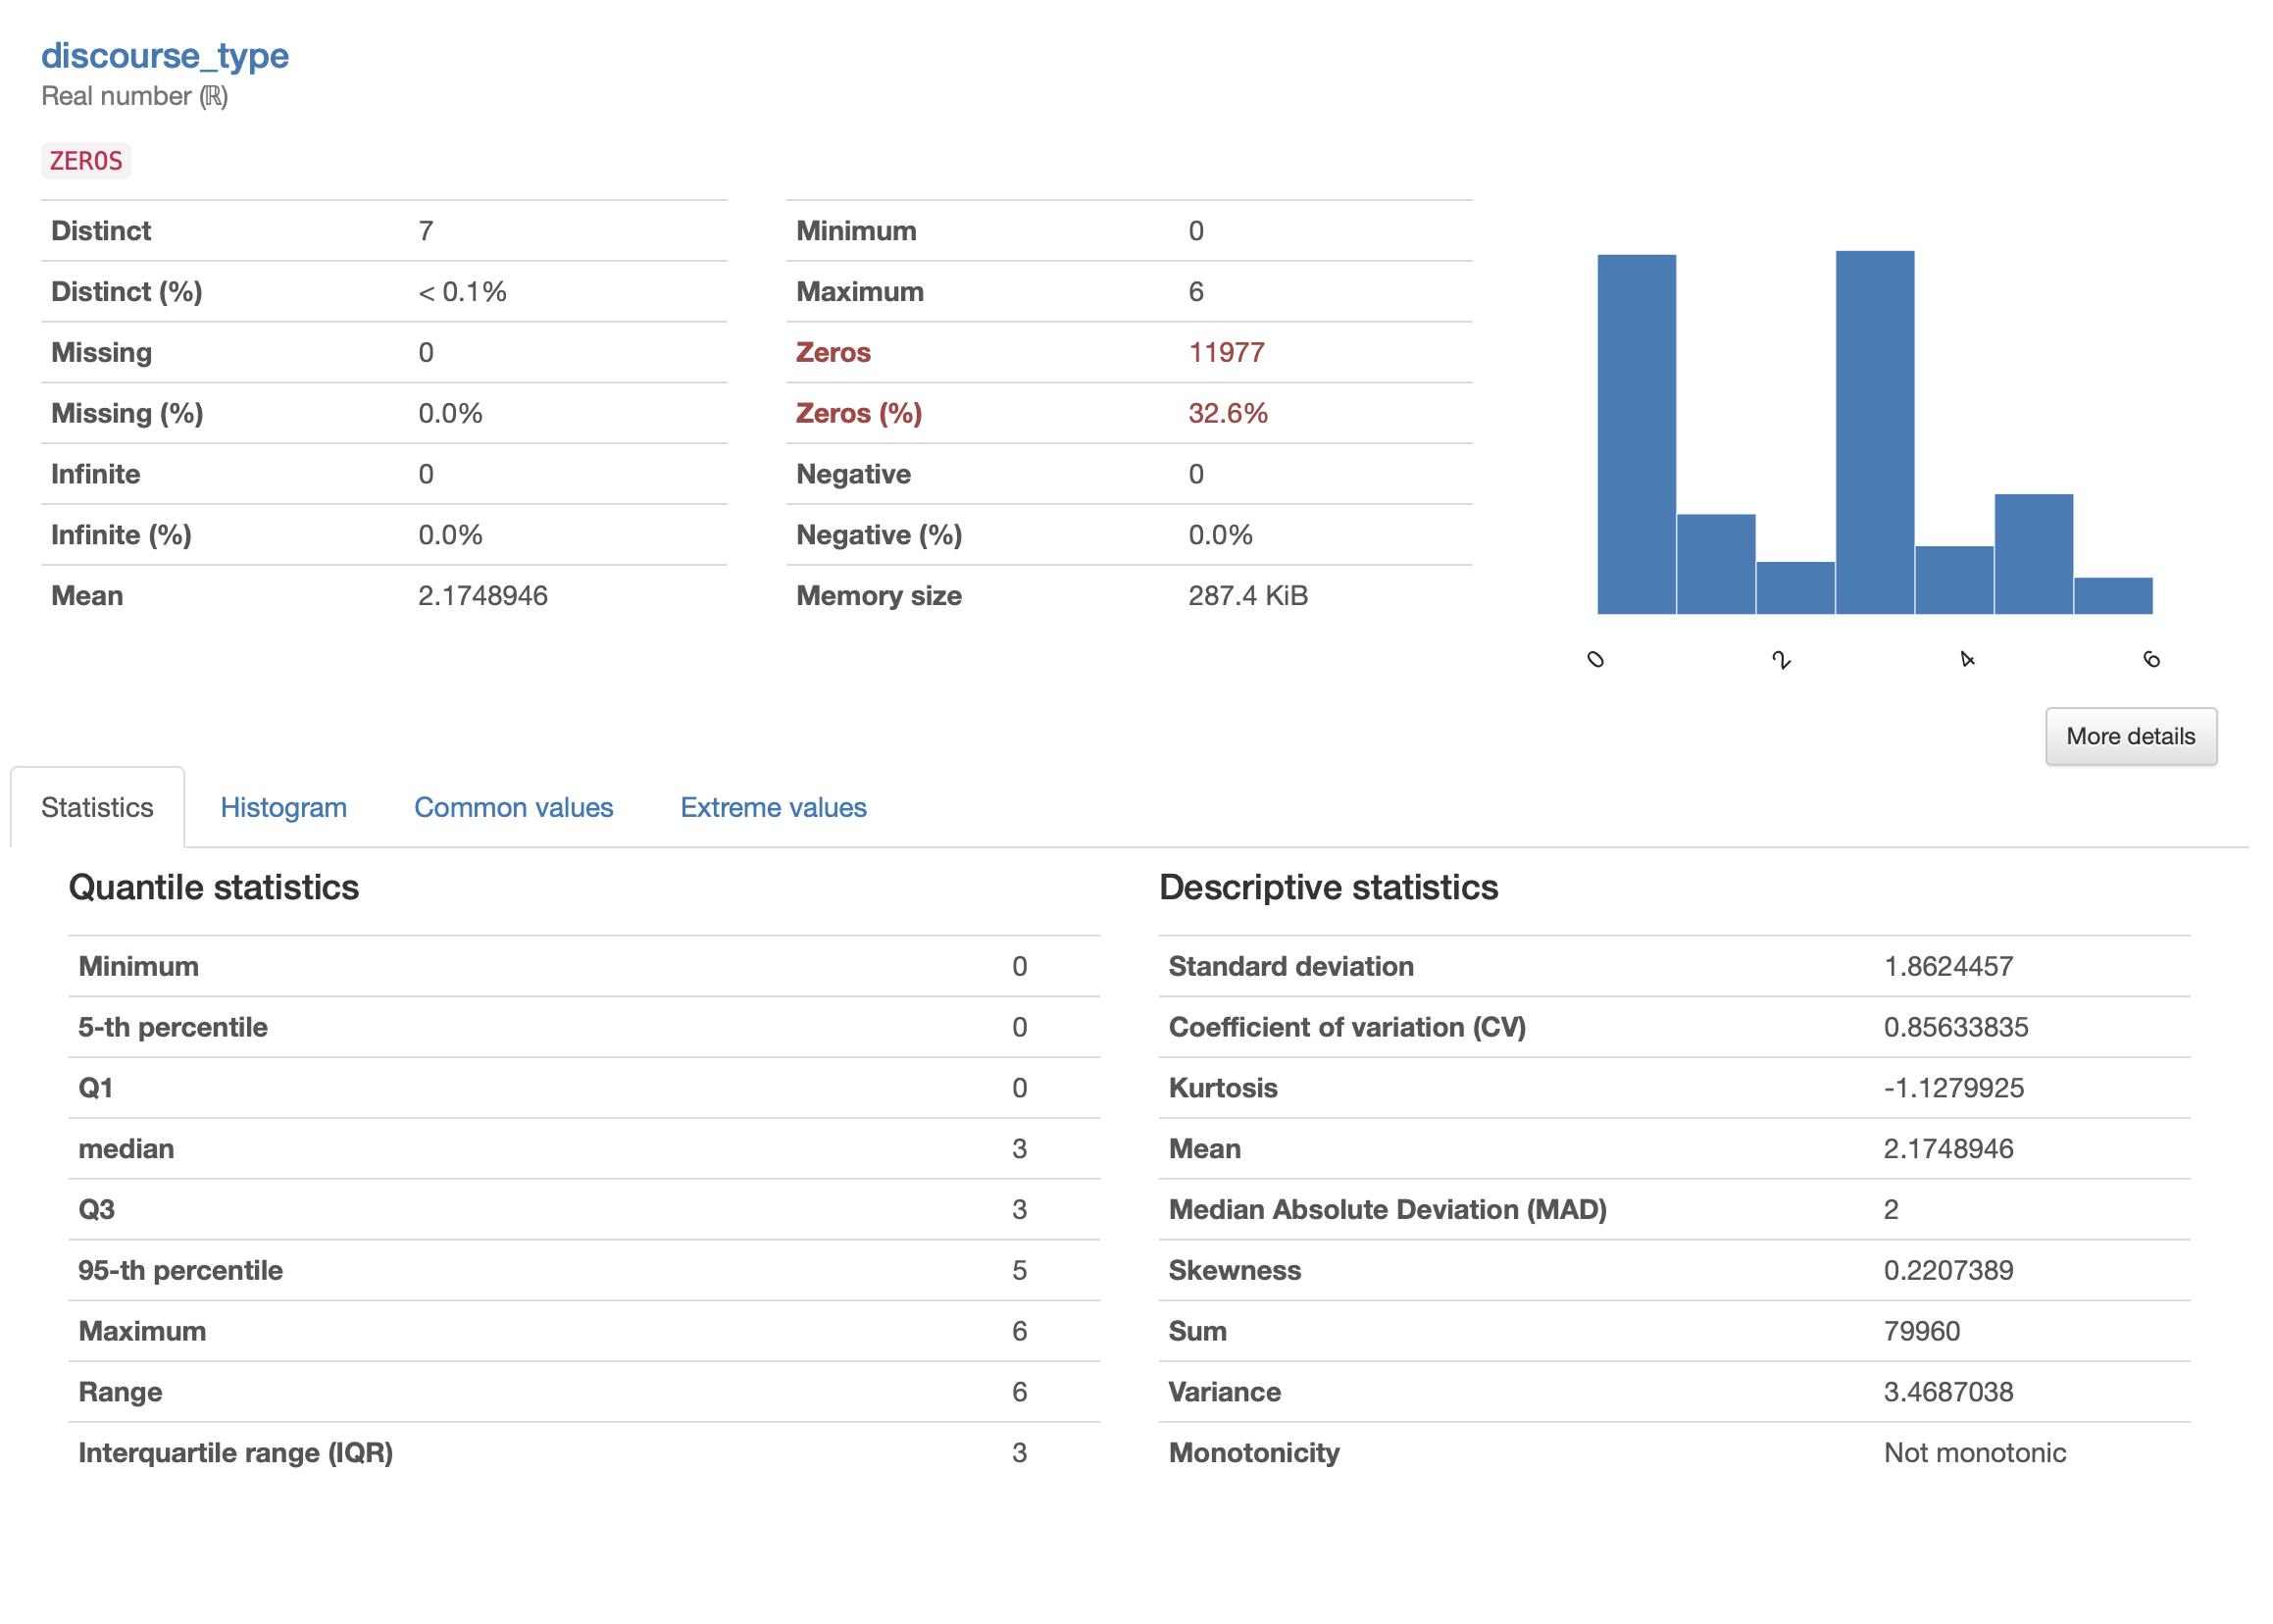

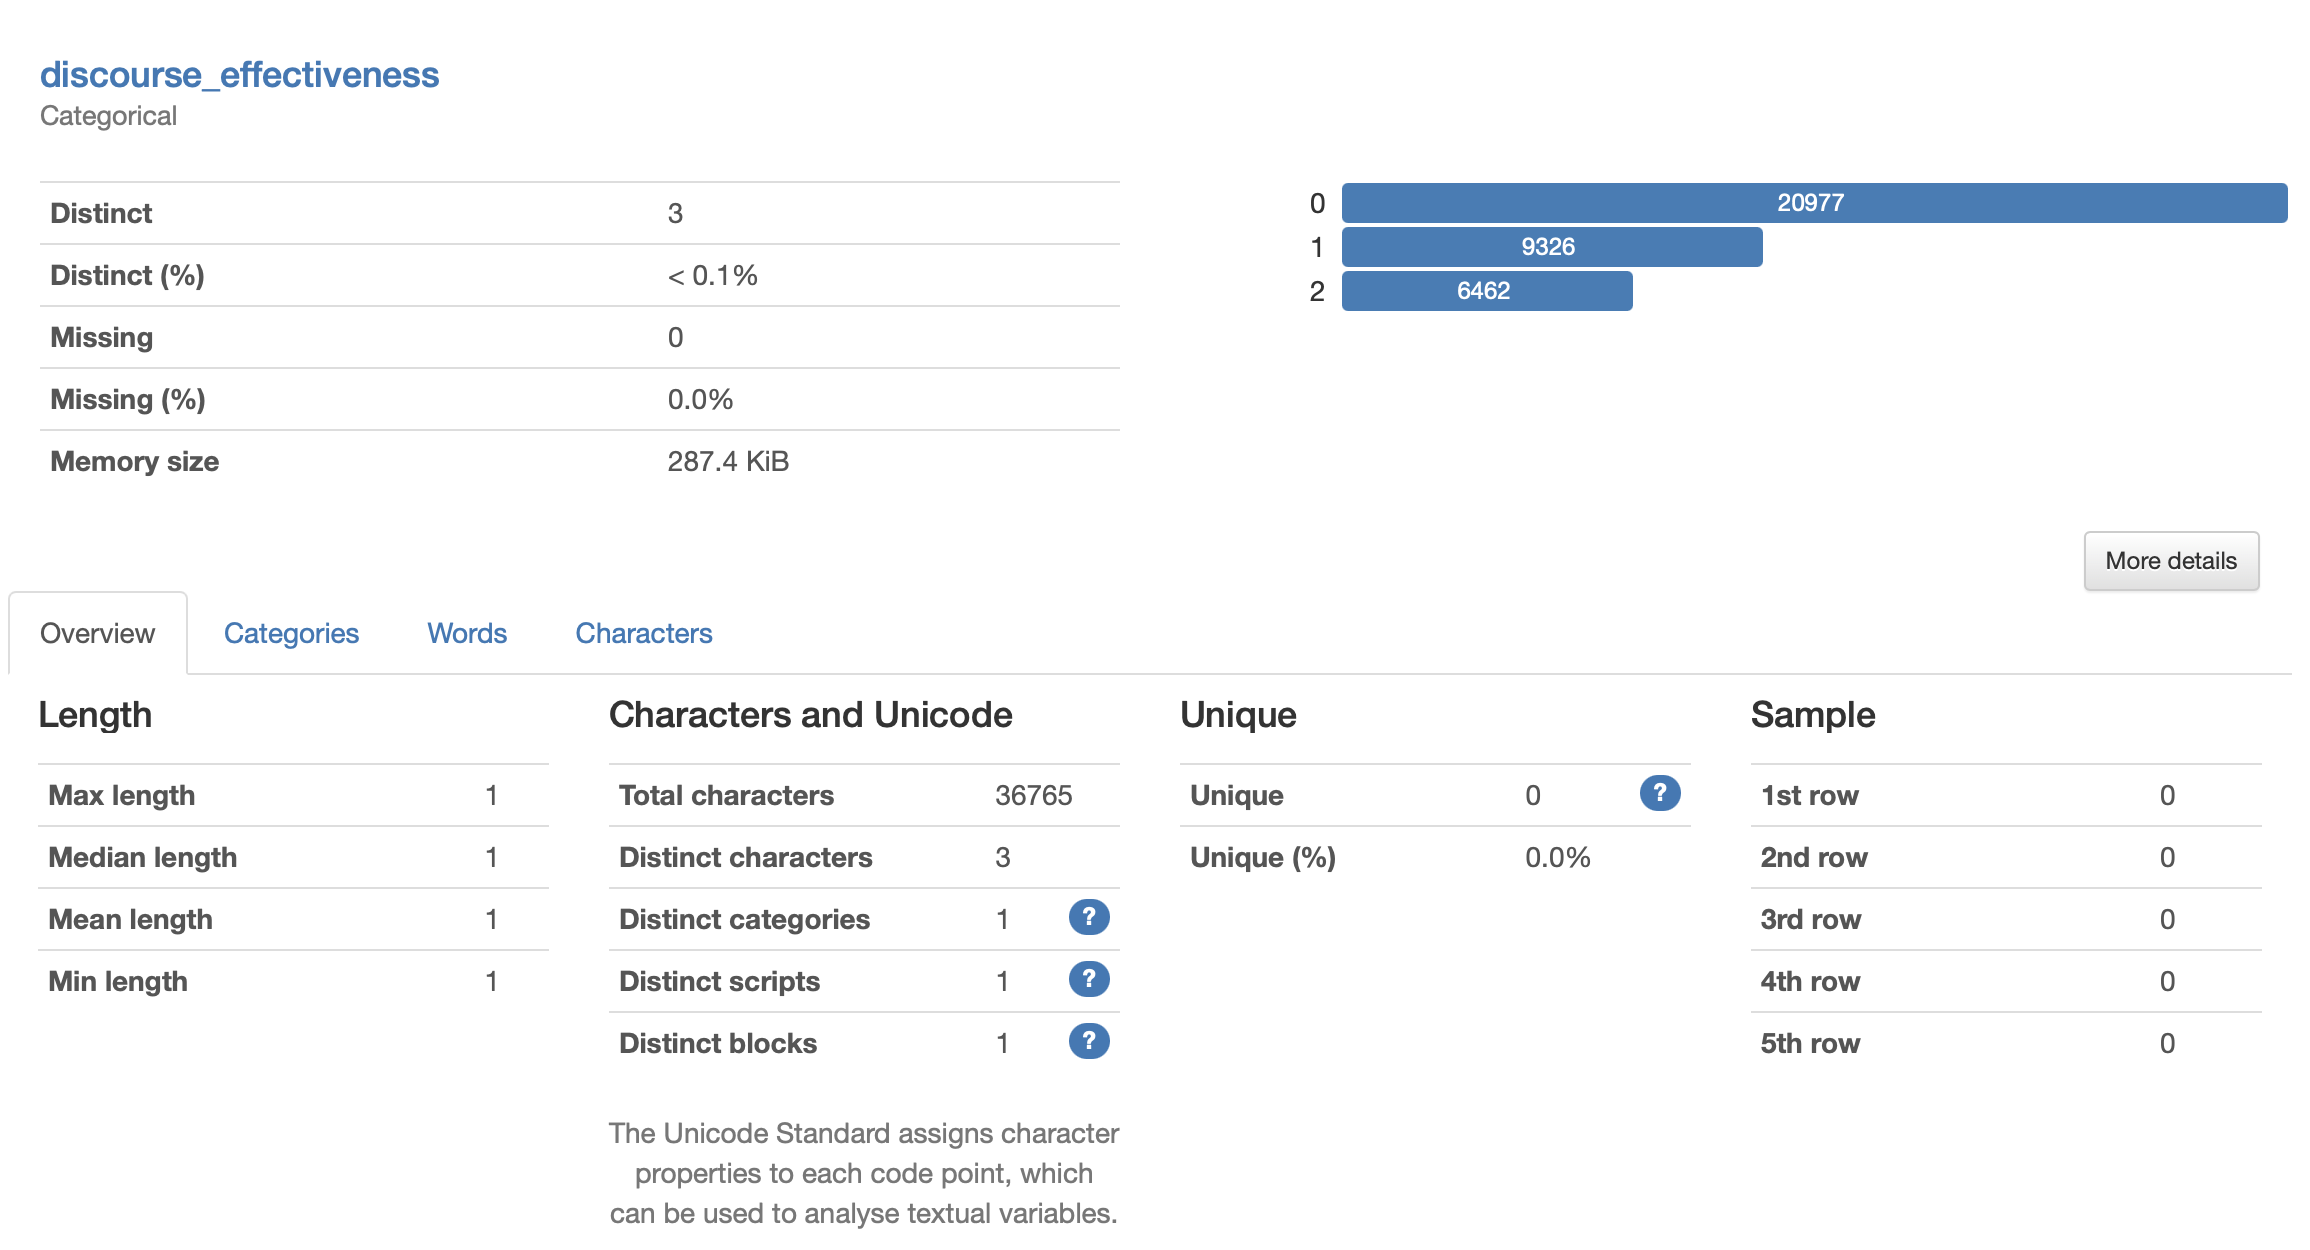

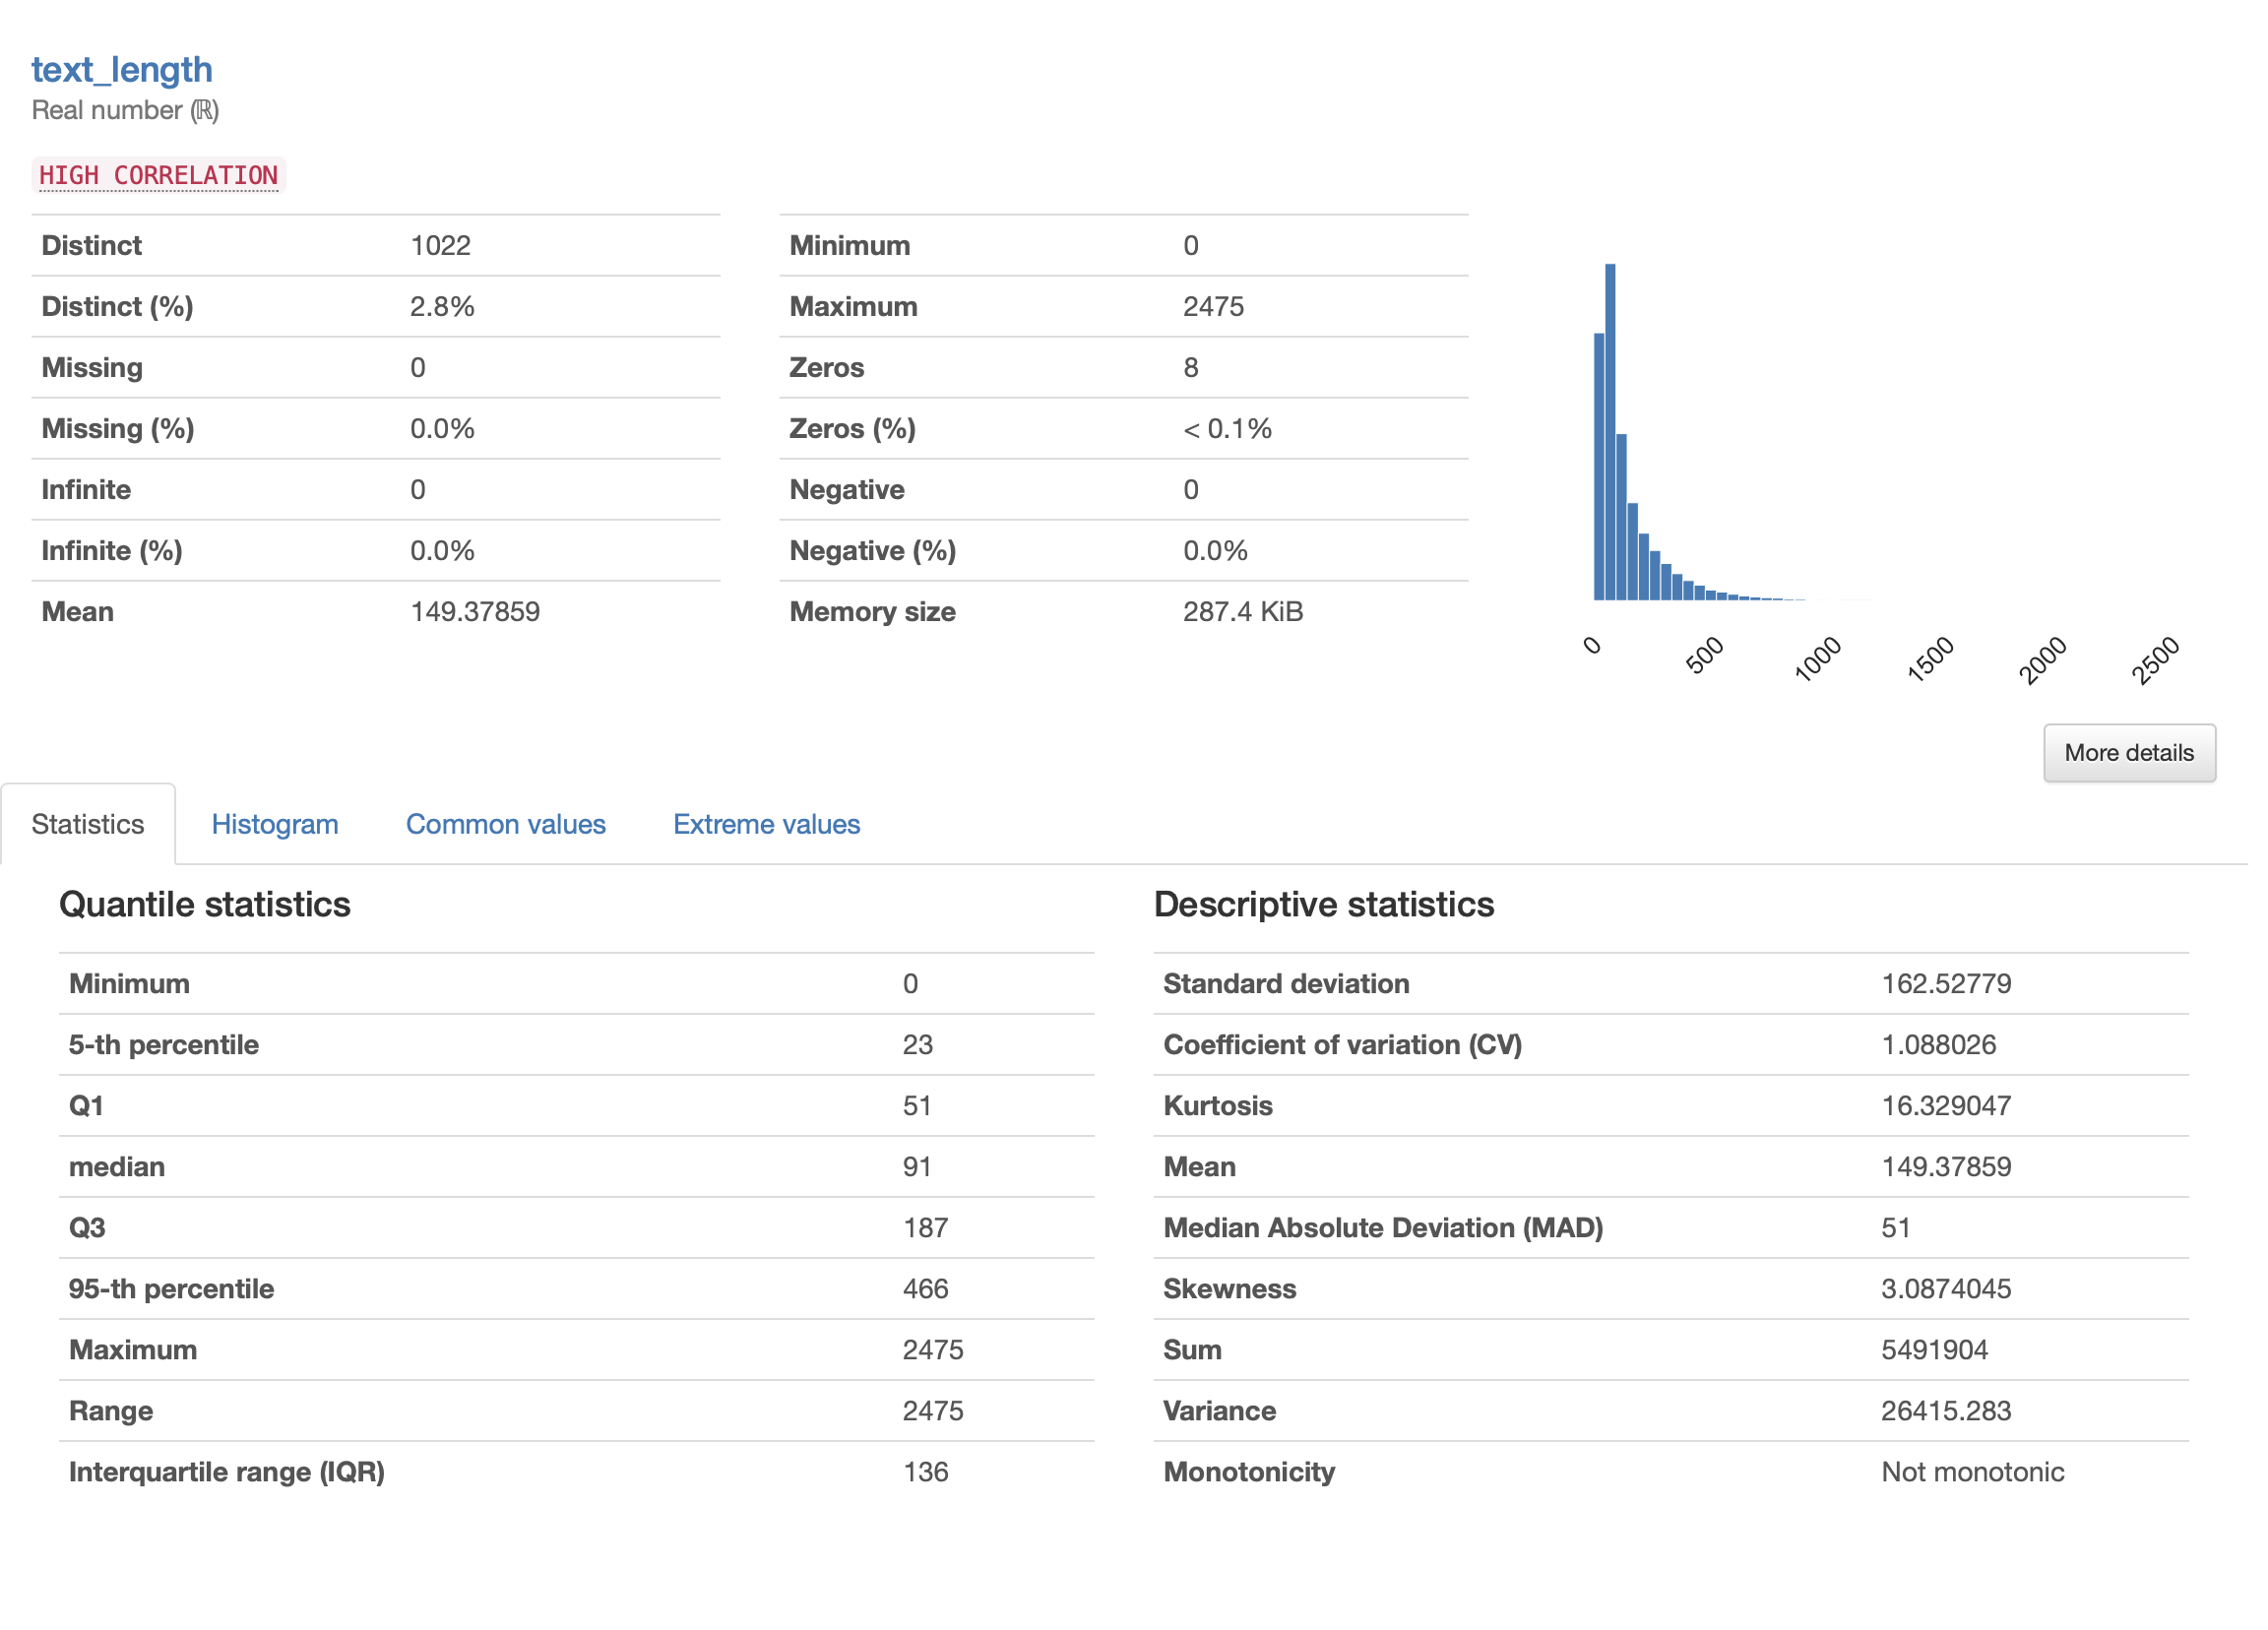

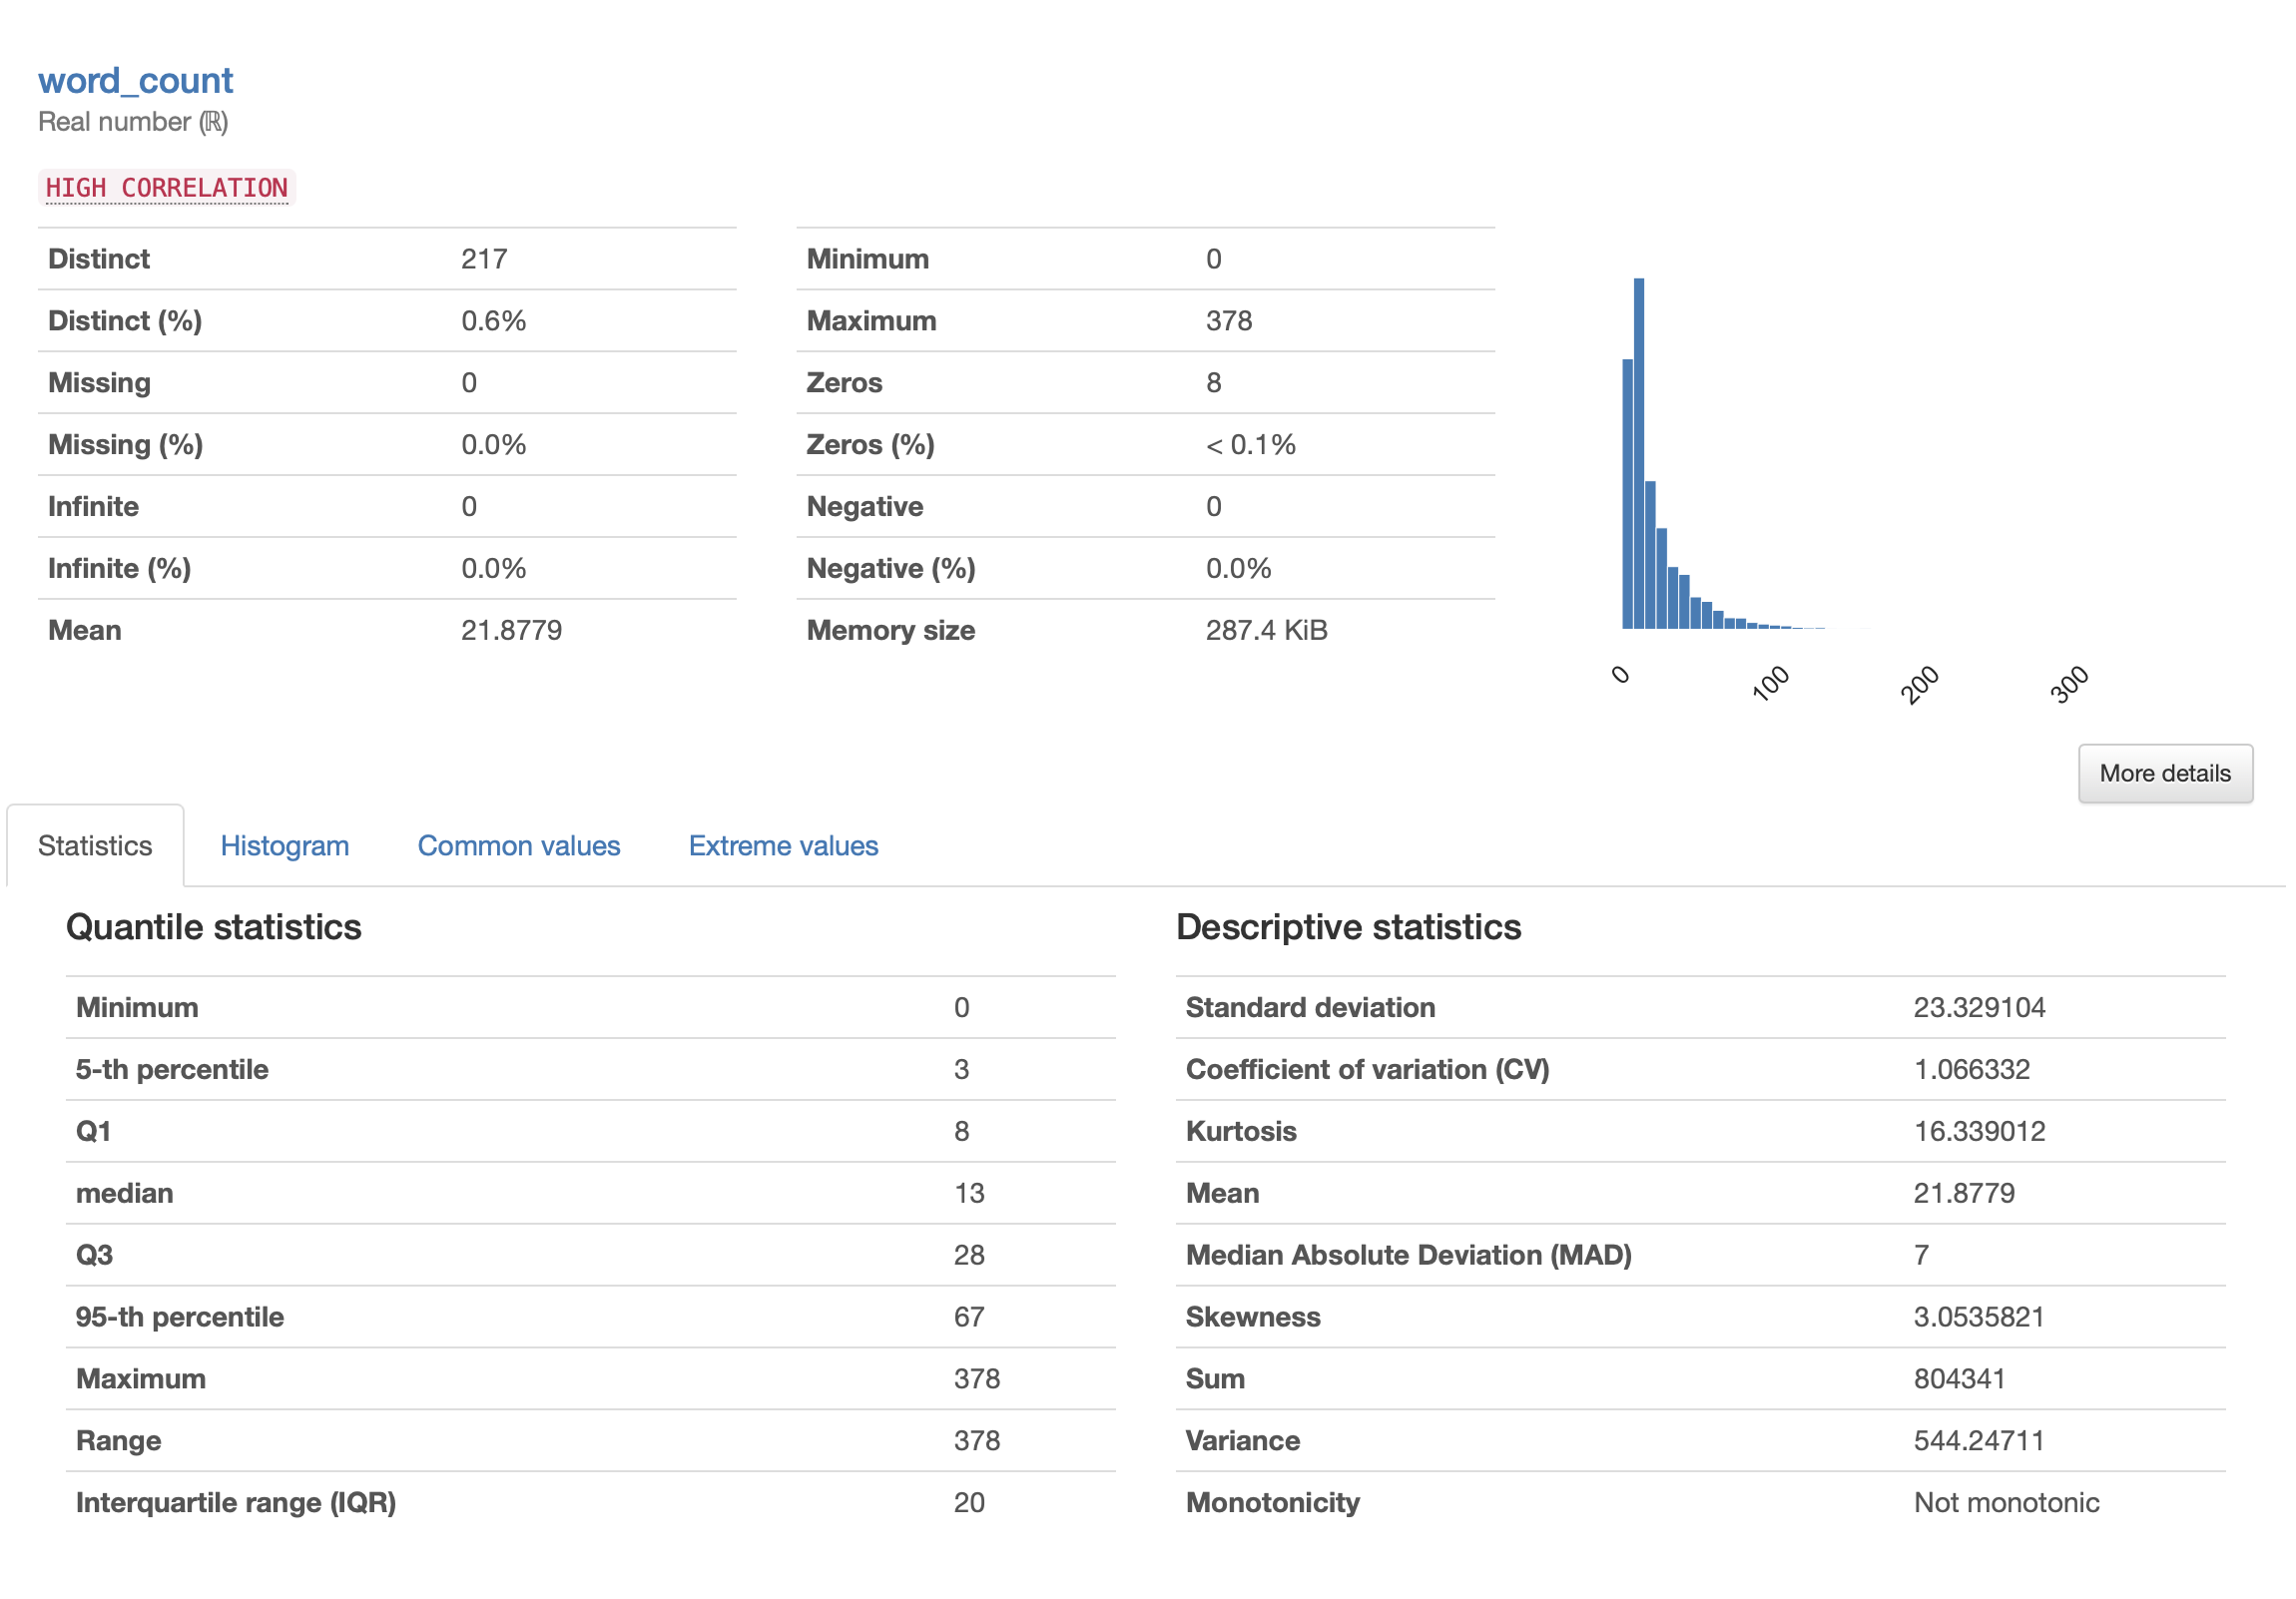

##### Variables correlation

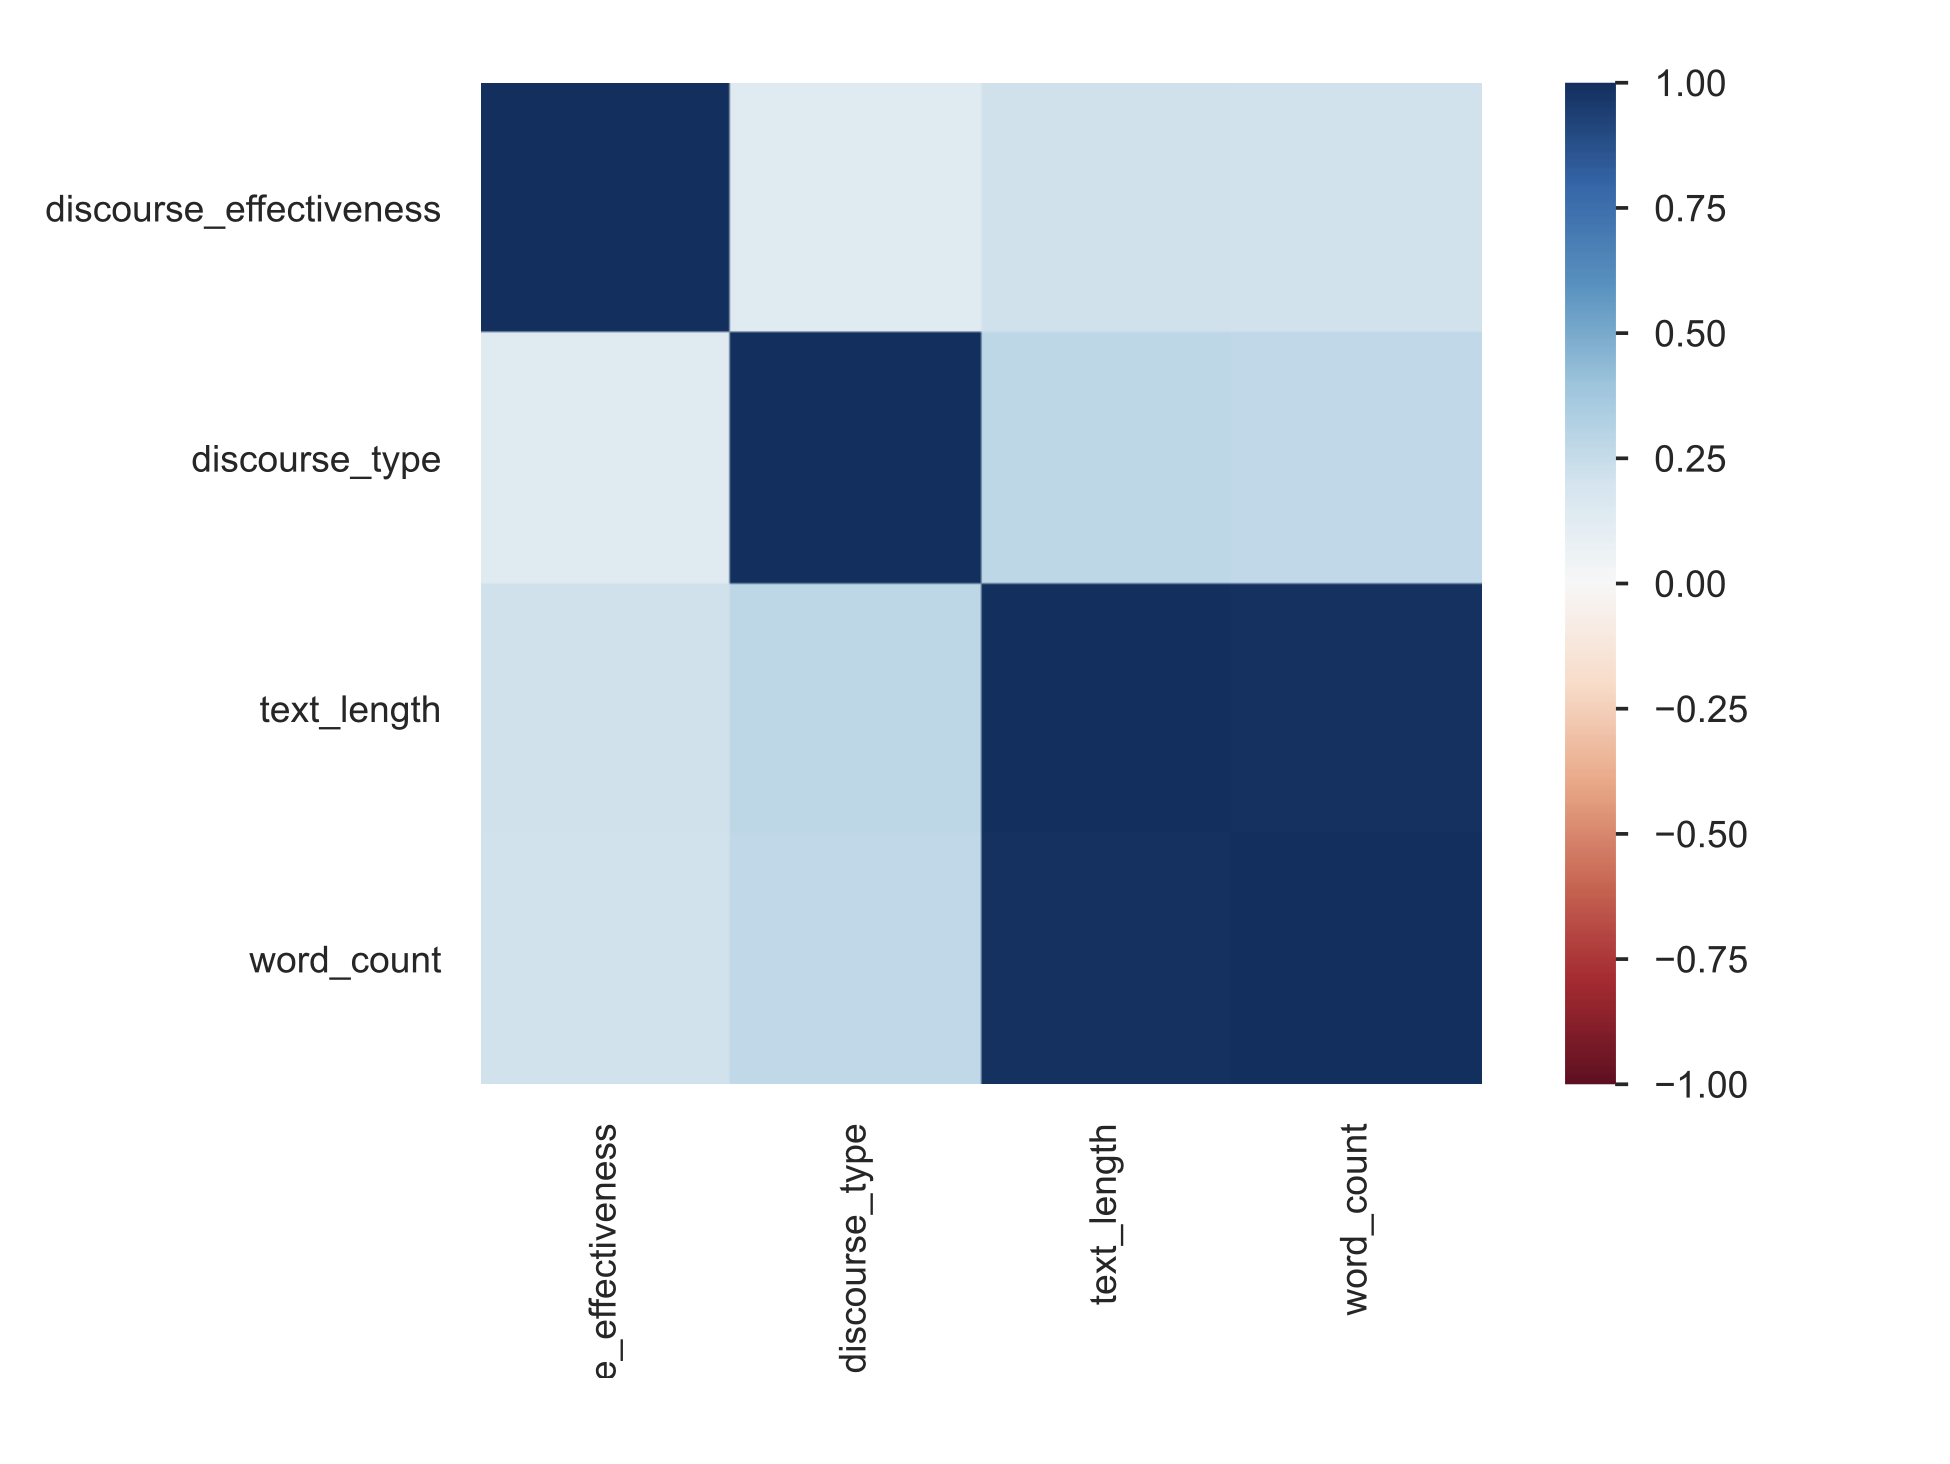

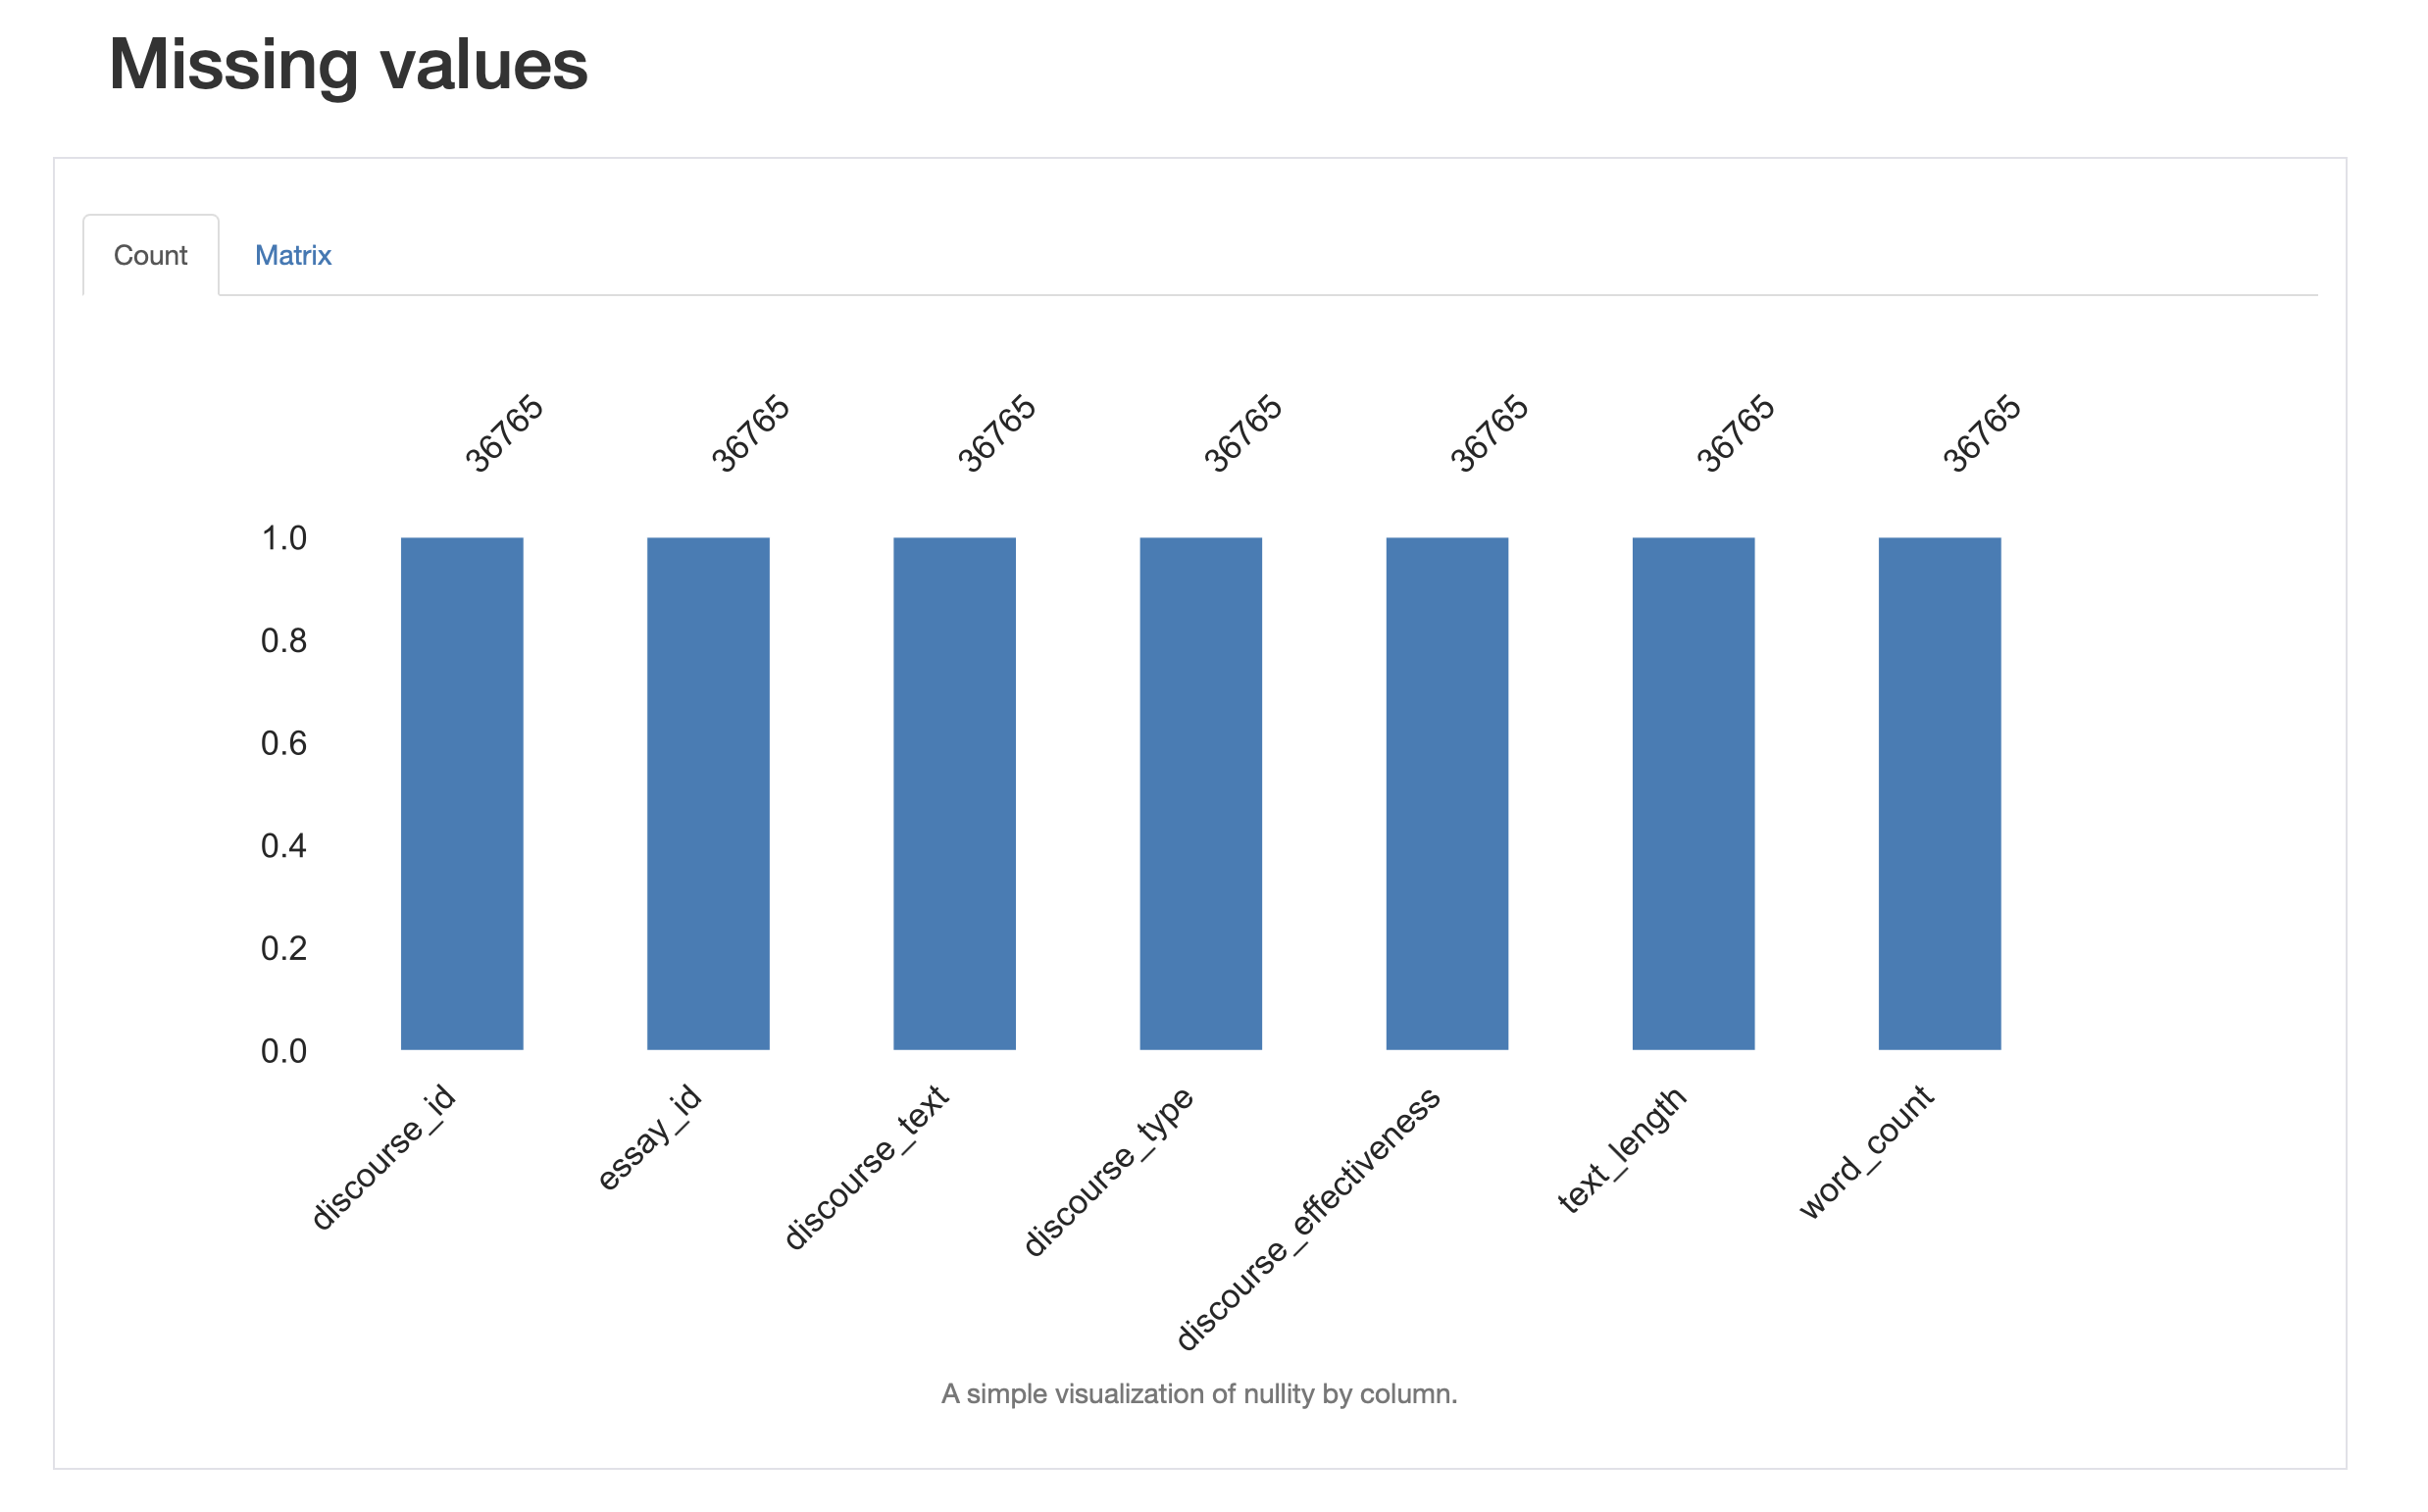

### Analisis exploratorio

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'text_length', 'word_count'],
      dtype='object')
Estadística descriptiva para variables cuantitativas:
        text_length    word_count
count  36765.000000  36765.000000
mean     149.328002     21.861036
std      162.488615     23.314432
min        0.000000      0.000000
25%       51.000000      8.000000
50%       91.000000     13.000000
75%      187.000000     28.000000
max     2475.000000    378.000000


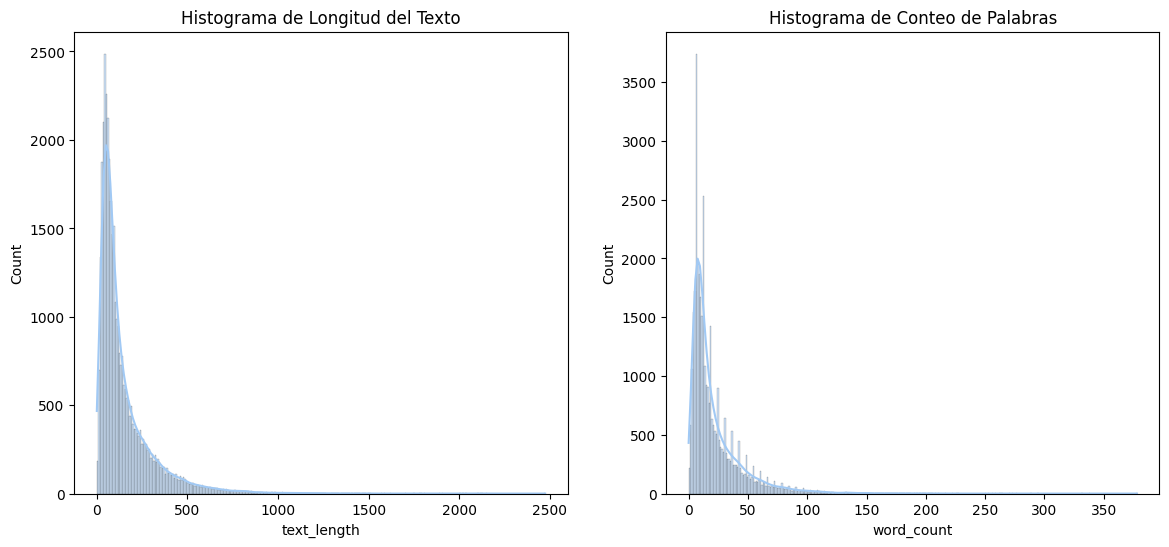

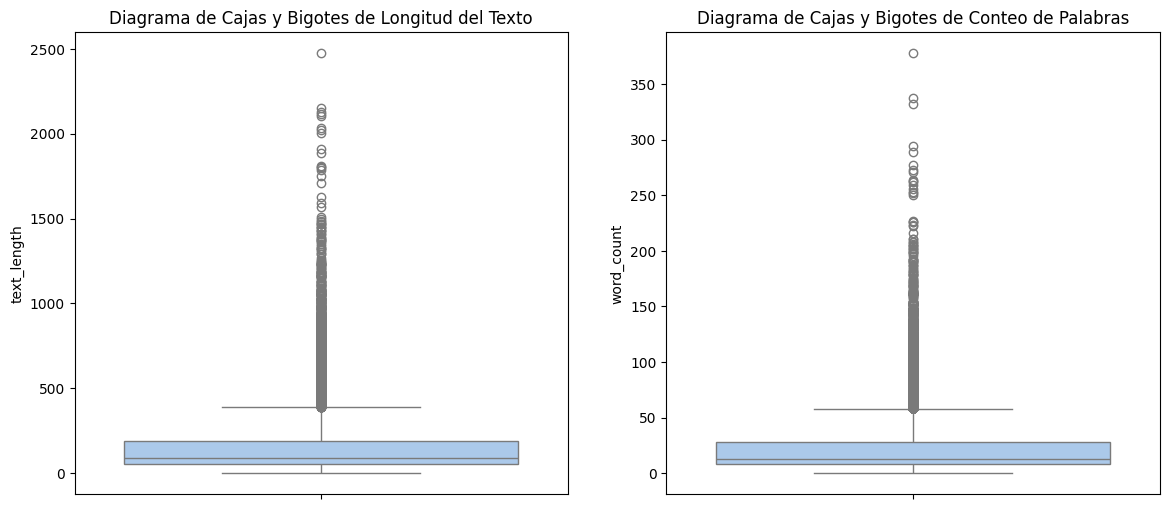

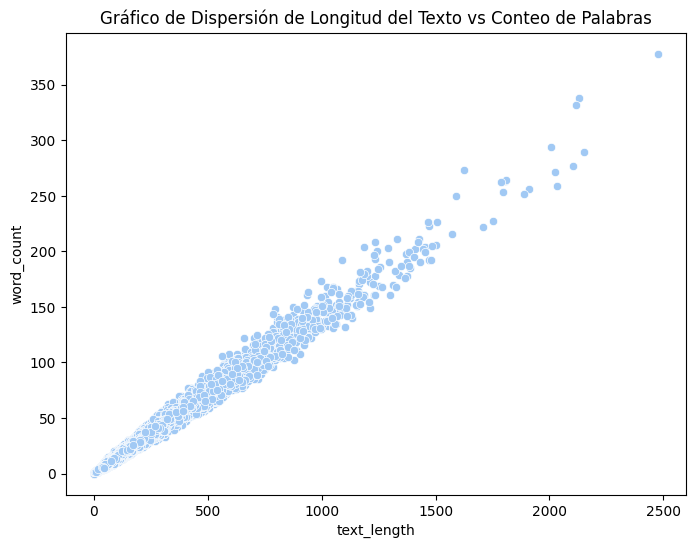

Matriz de correlación:
             text_length  word_count
text_length     1.000000    0.993361
word_count      0.993361    1.000000
Outliers en text_length:
       discourse_id      essay_id  \
99     4a7d11406893  01E9D9CD5CBF   
110    d1c5f0d13151  021663FD2F2E   
208    4b1e4c493bfd  0491C7BFA9B4   
290    3f78eb74796e  071BF63AF332   
293    506f1d68d554  071BF63AF332   
...             ...           ...   
36461  012da845728f  E9179F8981D6   
36463  6c7a6e7f52ab  E9179F8981D6   
36531  5f69f1fc5f71  EDACE717C302   
36654  b1f96b34280e  F93D06BC99D8   
36689  479fb02ae14b  FD05FDCEA11B   

                                          discourse_text  discourse_type  \
99     study ability human read subatle changesin fac...               3   
110    mona lisa demonstration really intended bring ...               3   
208    attention resident community bendz suburban go...               3   
290    joining extracurricular activity club sport te...               3   
293    ubs sport

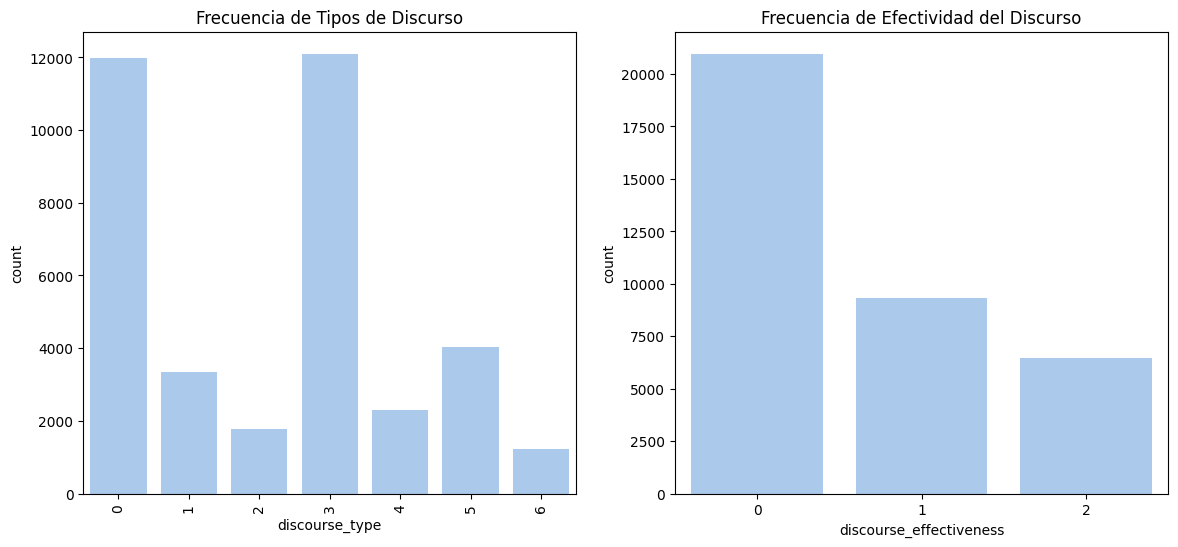

Tablas de proporciones para variables categóricas:
discourse_type
3    0.329325
0    0.325788
5    0.109449
1    0.091166
4    0.062328
2    0.048236
6    0.033708
Name: proportion, dtype: float64
discourse_effectiveness
0    0.570558
1    0.253720
2    0.175722
Name: proportion, dtype: float64


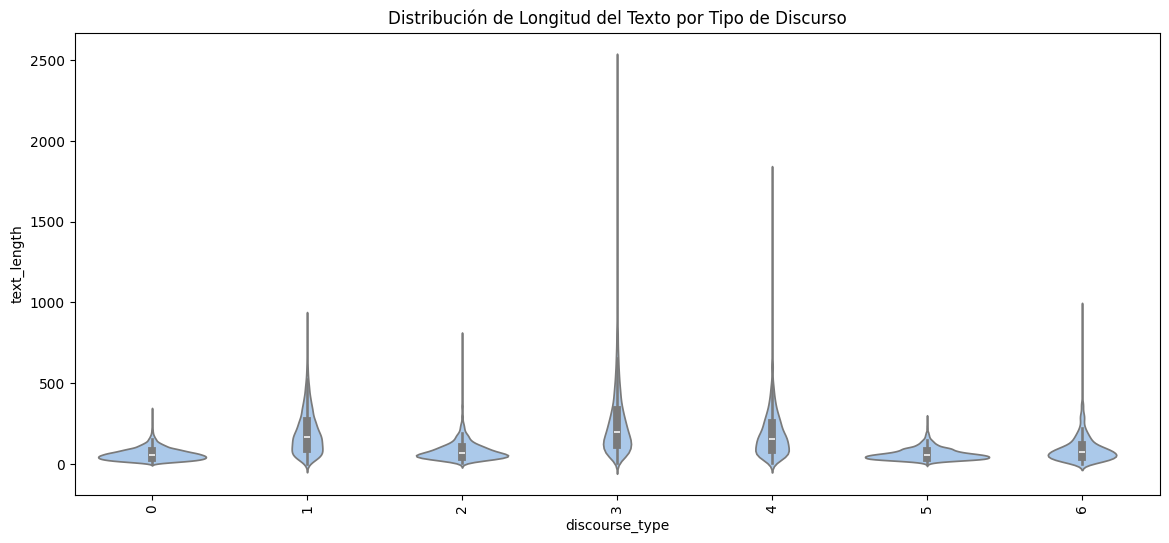

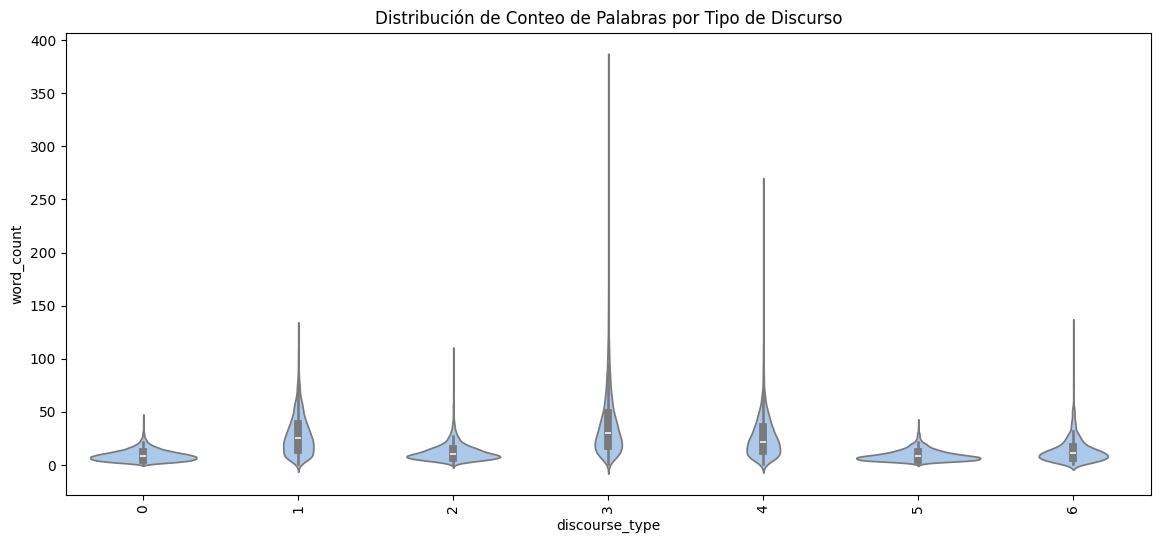

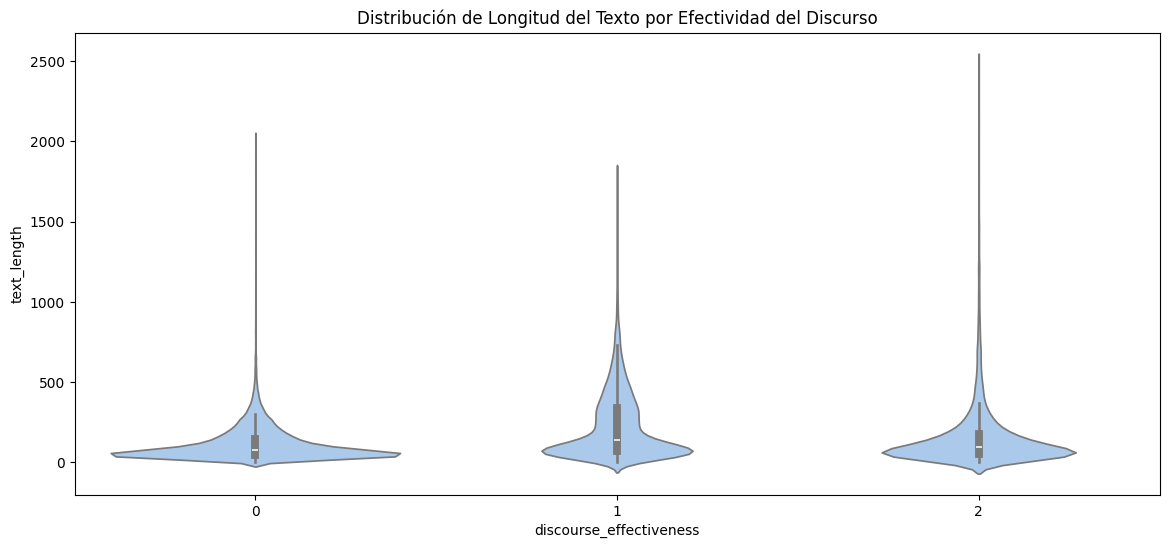

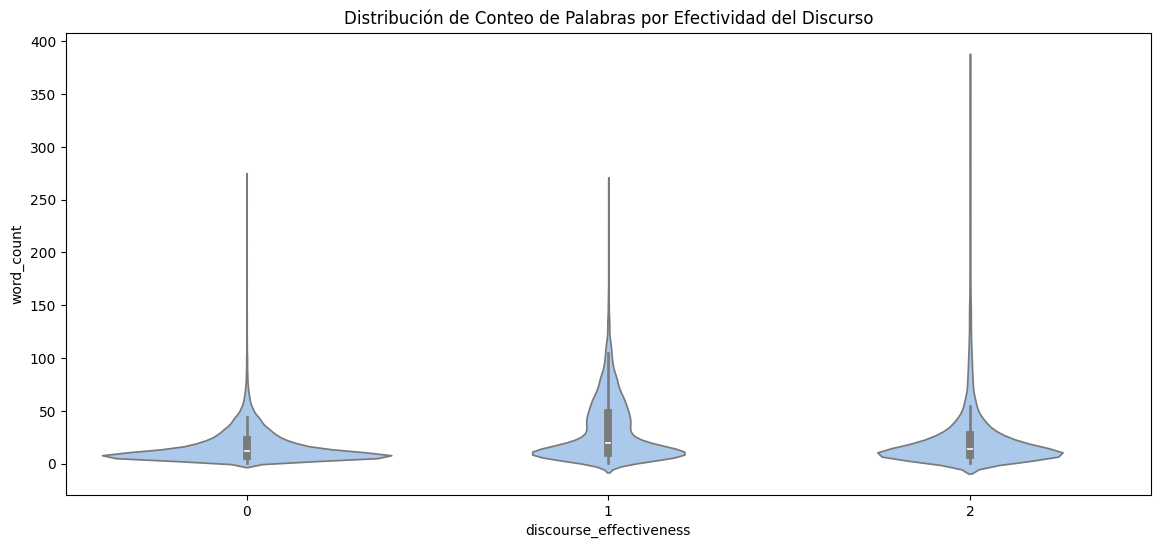

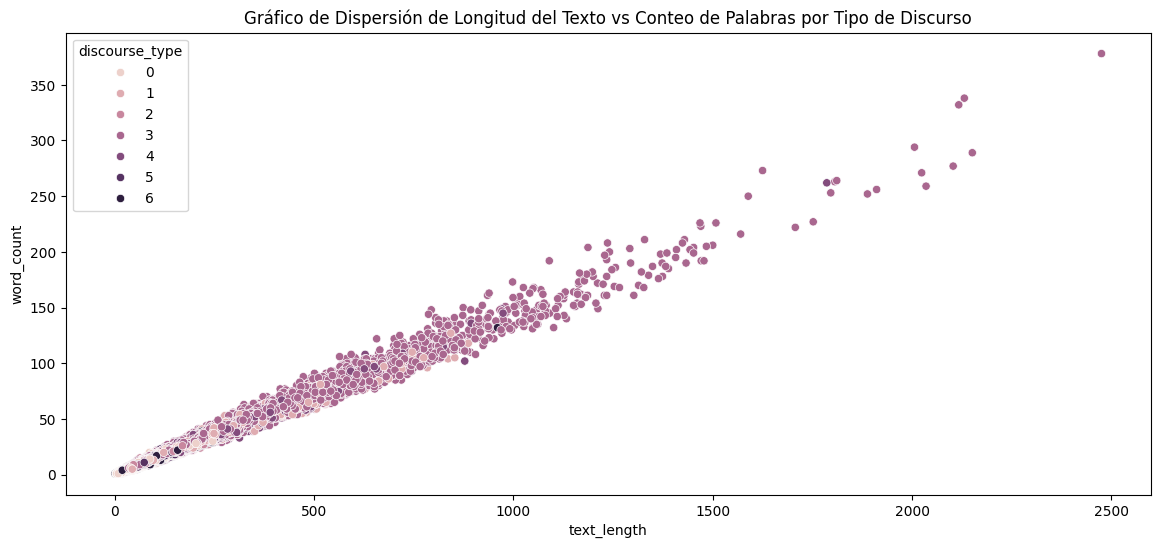

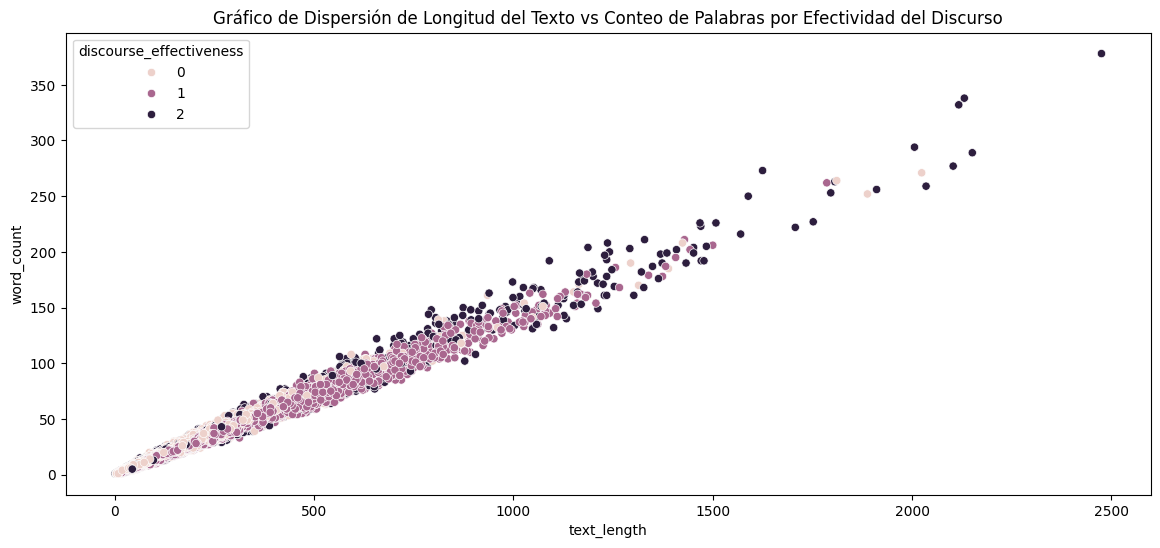

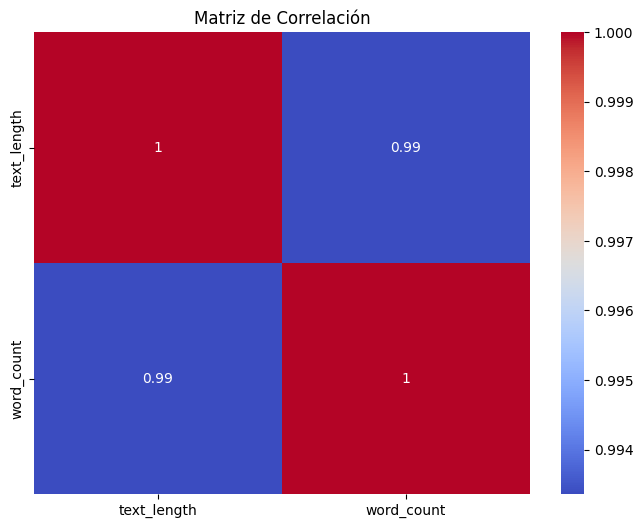

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar los gráficos de matplotlib en el notebook
%matplotlib inline

# Cargar el dataset
train = pd.read_csv('result/data_cleaned.csv')
print(train.columns)

# Estadística descriptiva para variables cuantitativas
print("Estadística descriptiva para variables cuantitativas:")
print(train[['text_length', 'word_count']].describe())

# Gráficos exploratorios
plt.figure(figsize=(14, 6))

# Histograma para text_length
plt.subplot(1, 2, 1)
sns.histplot(train['text_length'], kde=True)
plt.title('Histograma de Longitud del Texto')

# Histograma para word_count
plt.subplot(1, 2, 2)
sns.histplot(train['word_count'], kde=True)
plt.title('Histograma de Conteo de Palabras')

plt.show()

# Diagramas de cajas y bigotes
plt.figure(figsize=(14, 6))

# Diagrama de cajas para text_length
plt.subplot(1, 2, 1)
sns.boxplot(y=train['text_length'])
plt.title('Diagrama de Cajas y Bigotes de Longitud del Texto')

# Diagrama de cajas para word_count
plt.subplot(1, 2, 2)
sns.boxplot(y=train['word_count'])
plt.title('Diagrama de Cajas y Bigotes de Conteo de Palabras')

plt.show()

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='word_count', data=train)
plt.title('Gráfico de Dispersión de Longitud del Texto vs Conteo de Palabras')
plt.show()

# Análisis de correlaciones
correlation_matrix = train[['text_length', 'word_count']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Identificación de outliers
outliers_text_length = train[train['text_length'] > train['text_length'].quantile(0.99)]
outliers_word_count = train[train['word_count'] > train['word_count'].quantile(0.99)]
print("Outliers en text_length:")
print(outliers_text_length)
print("Outliers en word_count:")
print(outliers_word_count)

# Manejo de valores faltantes
print("Valores faltantes:")
print(train.isnull().sum())
train = train.dropna()  # O puedes usar train.fillna() para imputar valores

# Análisis de variables categóricas
print("Tablas de frecuencia para variables categóricas:")
print(train['discourse_type'].value_counts())
print(train['discourse_effectiveness'].value_counts())

# Gráficos de barra para variables categóricas
plt.figure(figsize=(14, 6))

# Gráfico de barra para discourse_type
plt.subplot(1, 2, 1)
sns.countplot(x='discourse_type', data=train)
plt.title('Frecuencia de Tipos de Discurso')
plt.xticks(rotation=90)

# Gráfico de barra para discourse_effectiveness
plt.subplot(1, 2, 2)
sns.countplot(x='discourse_effectiveness', data=train)
plt.title('Frecuencia de Efectividad del Discurso')

plt.show()

# Tablas de proporciones
print("Tablas de proporciones para variables categóricas:")
print(train['discourse_type'].value_counts(normalize=True))
print(train['discourse_effectiveness'].value_counts(normalize=True))

# Gráficos adicionales

# Gráfico de violín para text_length por discourse_type
plt.figure(figsize=(14, 6))
sns.violinplot(x='discourse_type', y='text_length', data=train)
plt.title('Distribución de Longitud del Texto por Tipo de Discurso')
plt.xticks(rotation=90)
plt.show()

# Gráfico de violín para word_count por discourse_type
plt.figure(figsize=(14, 6))
sns.violinplot(x='discourse_type', y='word_count', data=train)
plt.title('Distribución de Conteo de Palabras por Tipo de Discurso')
plt.xticks(rotation=90)
plt.show()

# Gráfico de violín para text_length por discourse_effectiveness
plt.figure(figsize=(14, 6))
sns.violinplot(x='discourse_effectiveness', y='text_length', data=train)
plt.title('Distribución de Longitud del Texto por Efectividad del Discurso')
plt.show()

# Gráfico de violín para word_count por discourse_effectiveness
plt.figure(figsize=(14, 6))
sns.violinplot(x='discourse_effectiveness', y='word_count', data=train)
plt.title('Distribución de Conteo de Palabras por Efectividad del Discurso')
plt.show()

# Gráfico de dispersión con hue para discourse_type
plt.figure(figsize=(14, 6))
sns.scatterplot(x='text_length', y='word_count', hue='discourse_type', data=train)
plt.title('Gráfico de Dispersión de Longitud del Texto vs Conteo de Palabras por Tipo de Discurso')
plt.show()

# Gráfico de dispersión con hue para discourse_effectiveness
plt.figure(figsize=(14, 6))
sns.scatterplot(x='text_length', y='word_count', hue='discourse_effectiveness', data=train)
plt.title('Gráfico de Dispersión de Longitud del Texto vs Conteo de Palabras por Efectividad del Discurso')
plt.show()

# Gráfico de calor para la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Proyecto 2 Resultados Parciales
Seleccione los algoritmos y/o modelos que usará para resolver su problema.
Modelos más prometedores 
- Transformadores: 
    Creemos que es prometedor aplicar los Transformadores porque los transformadores poseen un mecanismo de atención que es capaz de manejar una mayor cantidad de contexto y al analizar palabra por palabra dentro del texto, su entrenamiento se puede paralelizar por palabra; lo que lo hace mucho más veloz.

- Long Short-Term Memory:  
    Las RNN y las LSTM eran las que se utilizaban antes de los modelos basados en transformadores por su buen manejo de datos secuenciales y su captura de contexto, poseen un manejo de dependencias a largo plazo gracias a su memoria.


### Inciso 3
Construya varios modelos con los algoritmos que determinó que serían los más útiles.

pip install tf-keras


In [50]:
# Bloque 1: Importar librerías y cargar dataset
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout, Bidirectional
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Cargar dataset
data = pd.read_csv('./result/data_cleaned.csv')

# Visualización inicial de los datos
data.head()

# Preprocesamiento de las etiquetas
label_encoder = LabelEncoder()
data['discourse_effectiveness'] = label_encoder.fit_transform(data['discourse_effectiveness'])

# Dividir datos en entrenamiento y prueba
X = data['discourse_text'].values
y = data['discourse_effectiveness'].values

# Convertir valores no string a string
X = [str(text) if not isinstance(text, str) else text for text in X]

# Tokenización y padding para el texto
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, padding='post', maxlen=200)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [53]:
# LSTM Model 1: Simple LSTM
model1 = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    LSTM(128),
    Dense(3, activation='softmax')
])
model1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# LSTM Model 2: Bidirectional LSTM
model2 = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    Bidirectional(LSTM(128)),
    Dense(3, activation='softmax')
])
model2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# LSTM Model 3: LSTM with Dropout
model3 = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dense(3, activation='softmax')
])
model3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [54]:
# Entrenamiento de los modelos de LSTM
model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluar los modelos de LSTM
model1.evaluate(X_test, y_test)
model2.evaluate(X_test, y_test)
model3.evaluate(X_test, y_test)

Epoch 1/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 139s 147ms/step - accuracy: 0.5690 - loss: 0.9798 - val_accuracy: 0.5775 - val_loss: 0.9678
Epoch 2/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 140s 153ms/step - accuracy: 0.5669 - loss: 0.9796 - val_accuracy: 0.5775 - val_loss: 0.9692
Epoch 3/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 130s 141ms/step - accuracy: 0.5688 - loss: 0.9777 - val_accuracy: 0.5775 - val_loss: 0.9678
Epoch 4/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 123s 134ms/step - accuracy: 0.5659 - loss: 0.9792 - val_accuracy: 0.5776 - val_loss: 0.9688
Epoch 5/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 124s 135ms/step - accuracy: 0.5669 - loss: 0.9818 - val_accuracy: 0.5776 - val_loss: 0.9697
Epoch 1/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 207s 220ms/step - accuracy: 0.6133 - loss: 0.8793 - val_accuracy: 0.6468 - val_loss: 0.7963
Epoch 2/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 208s 226ms/step - accuracy: 0.6744 - loss: 0.7421 - val_accuracy: 0.6514 - val_loss: 0.7839
Epoch 3/5
920/920 ━━━━━━━━━━━━━━━━━━━━ 207s 225ms/step - accuracy: 0.7191 - loss: 0

[0.9681033492088318, 0.5774514079093933]